In [1]:
%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload

In [165]:
%run scr_control

## Armado de configuraciones estaticas por bloque

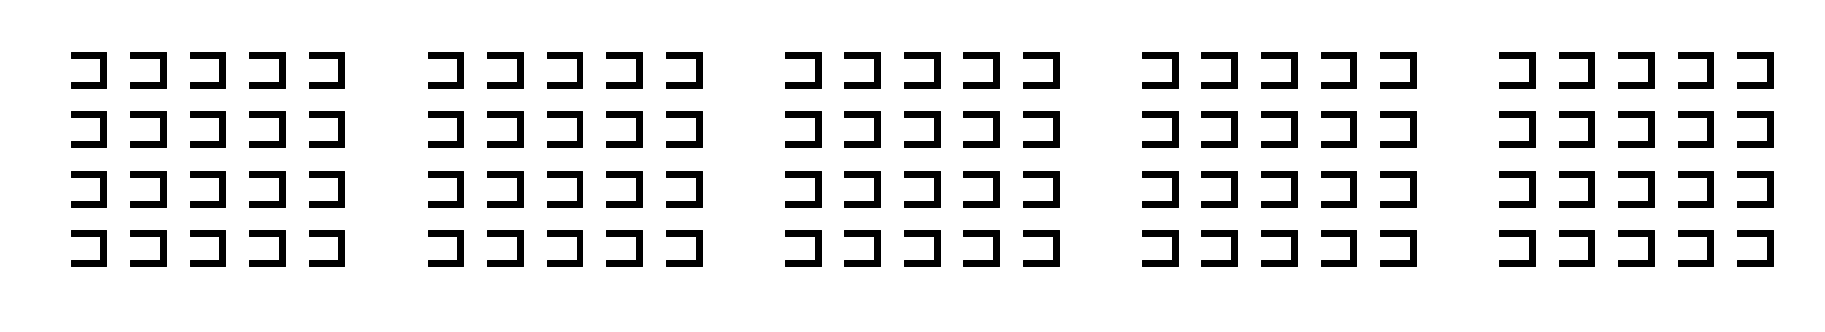

In [83]:
#configuracion cero armado directo explicitando el nombre
c = np.ones((5,20))*128
plot_scr(c.flatten())
save_config(c, 'configs/trg_0000.json')

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


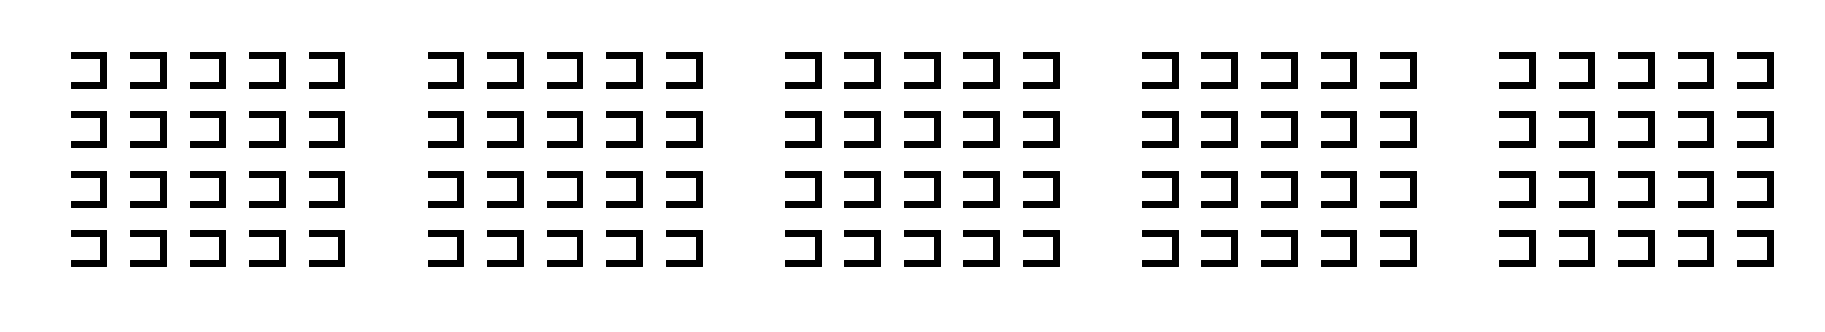

In [233]:
#referencia por numero y chequeo
c = load_config(configname(0))
plot_scr(c['values'].flatten())
#chequeo raido sin necesidad de graficar
print_config(0)

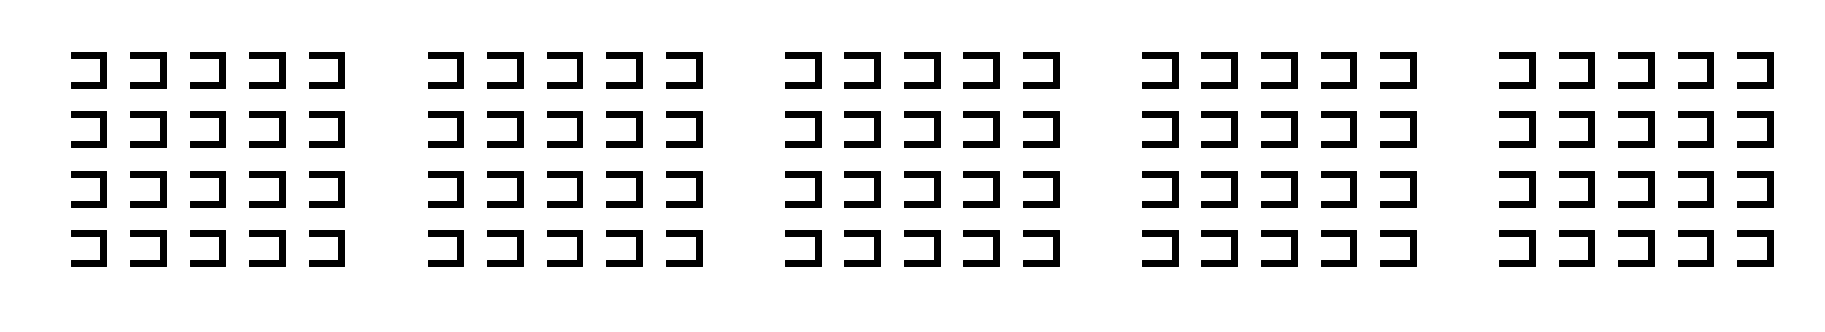

In [88]:
#configuracion cero usando make config y explicitando todos los parametros
c = make_config(value=angle_to_byte(0), clase='same',mod=0, tipo='trg')
plot_scr(c.flatten())
save_config(c,configname(0))

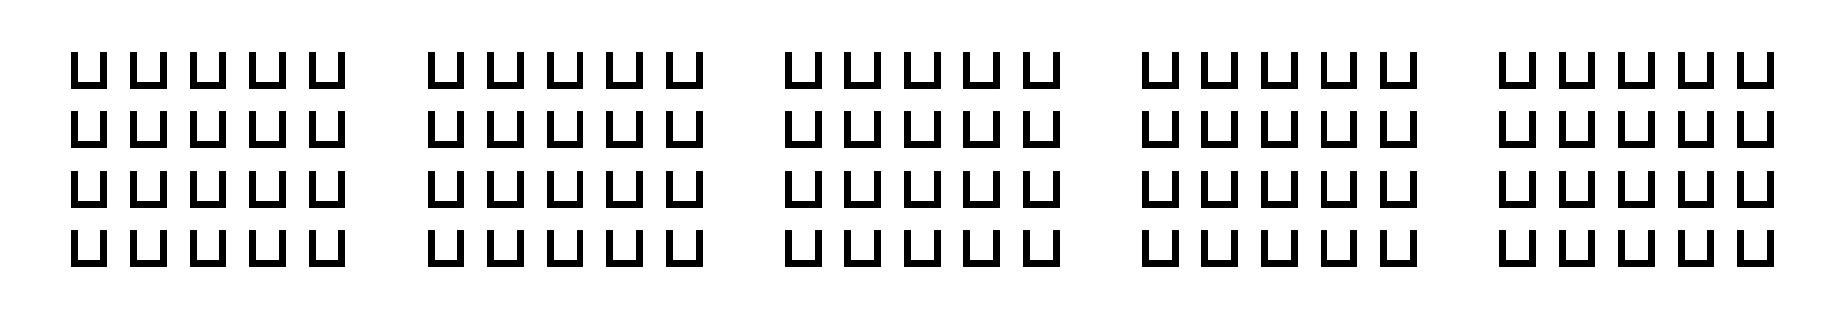

In [89]:
#configuracion todos a izquierda  usando make config usando parametros por defecto
c = make_config(value=angle_to_byte(-90))
plot_scr(c.flatten())
save_config(c, configname(1))

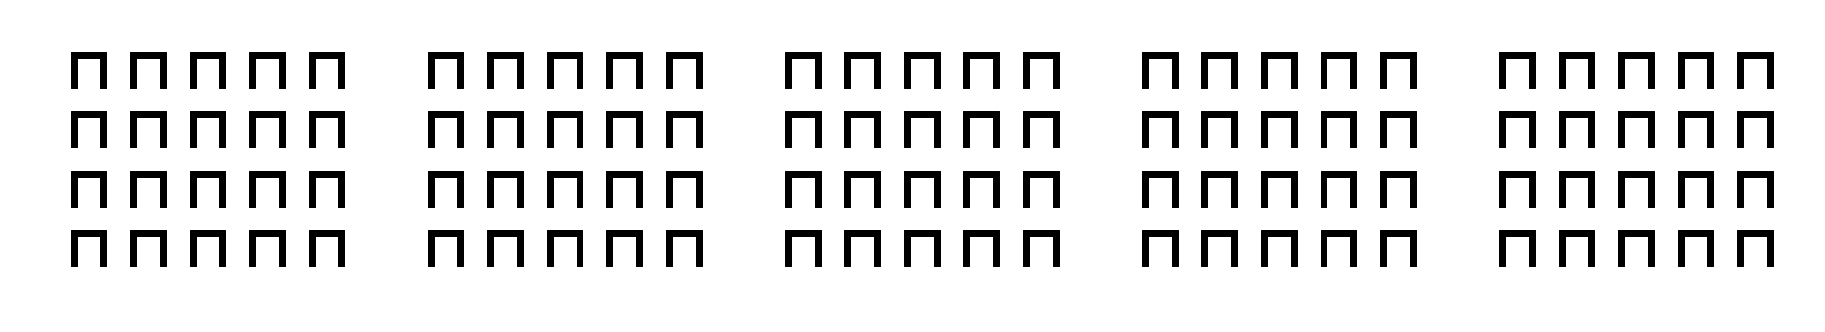

In [90]:
c = make_config(value=angle_to_byte(90))
plot_scr(c.flatten())
save_config(c, configname(2))

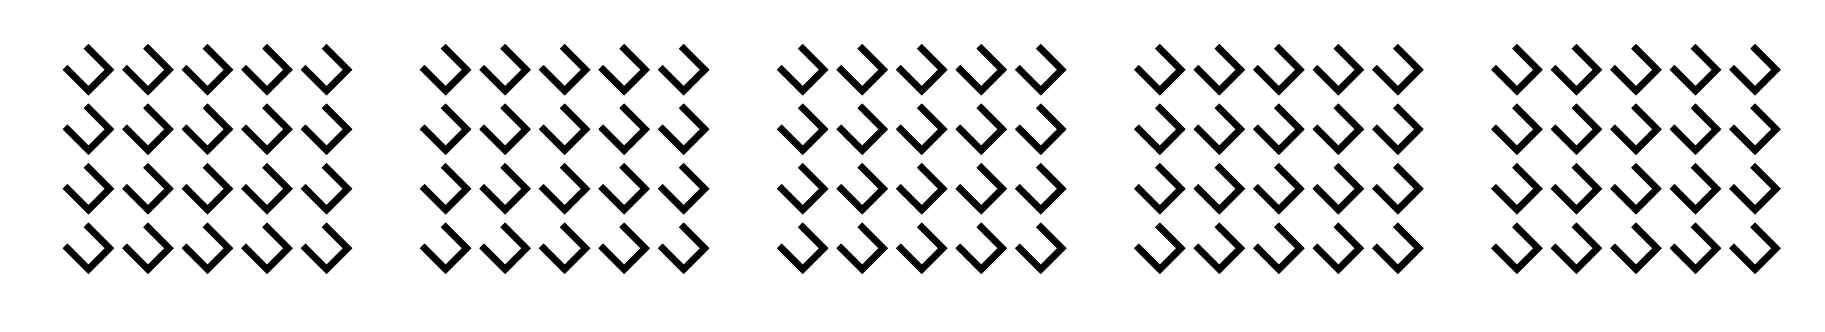

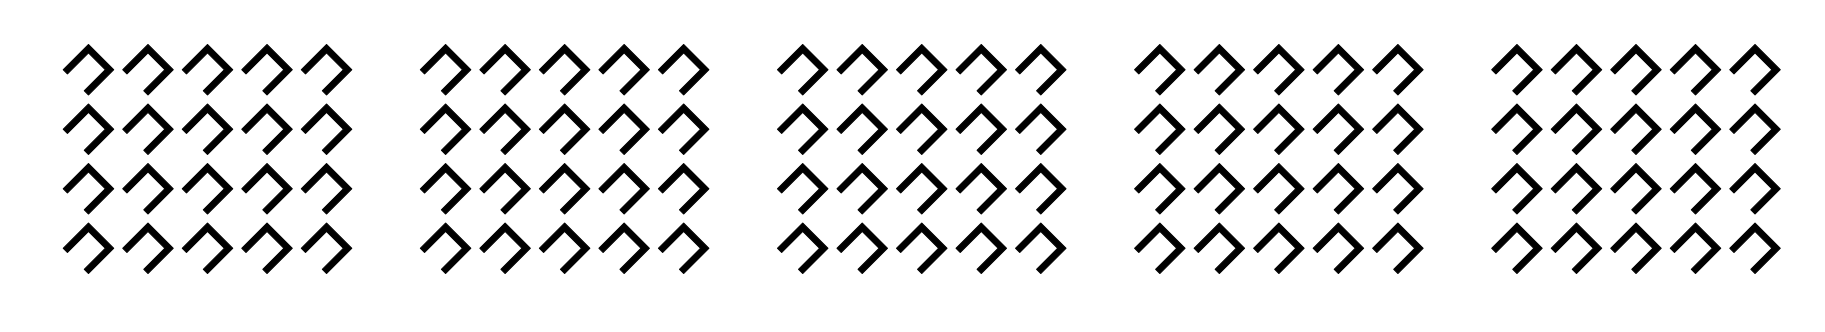

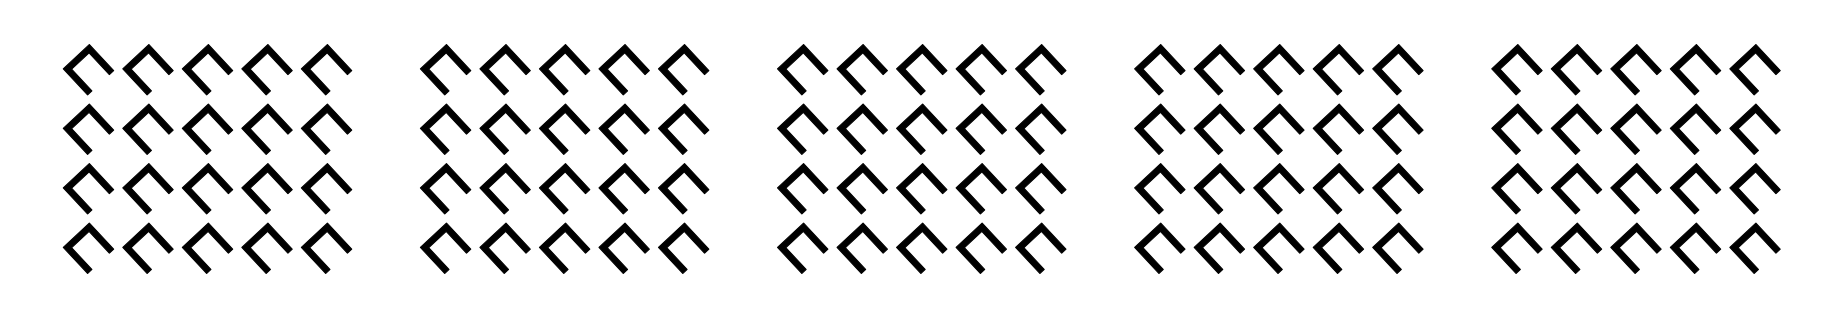

In [94]:
c = make_config(value=angle_to_byte(-45))
plot_scr(c.flatten())
save_config(c, configname(3))
c = make_config(value=angle_to_byte(45))
plot_scr(c.flatten())
save_config(c, configname(4))
c = make_config(value=angle_to_byte(135))
plot_scr(c.flatten())
save_config(c, configname(5))

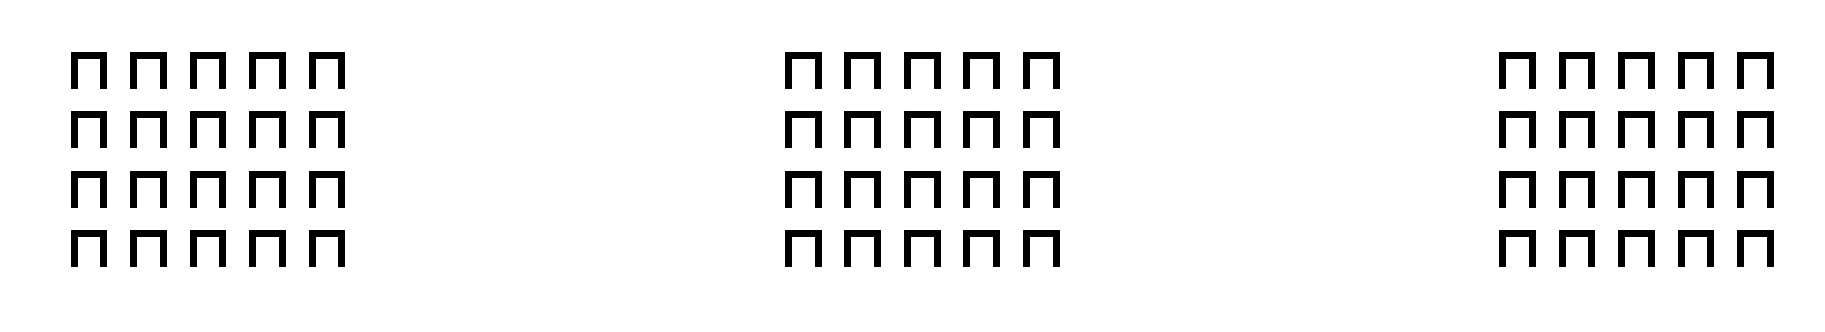

In [92]:
# solo para algunos modulos (sin guardar)
c = make_config(value=angle_to_byte(90),mod=[0,2,4])
plot_scr(c.flatten())

## Armado de configuraciones por fila o por columna y Secuencias

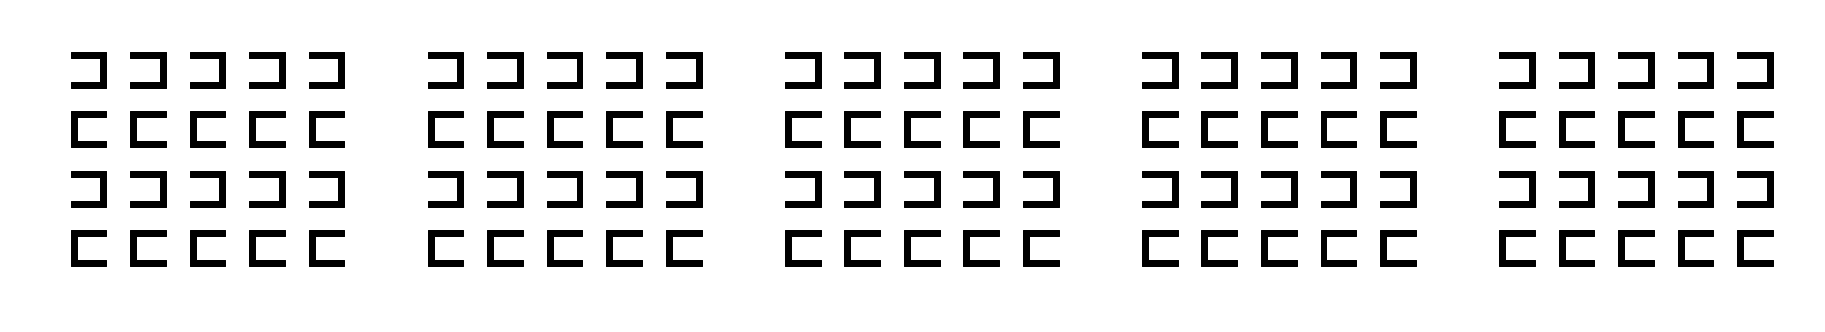

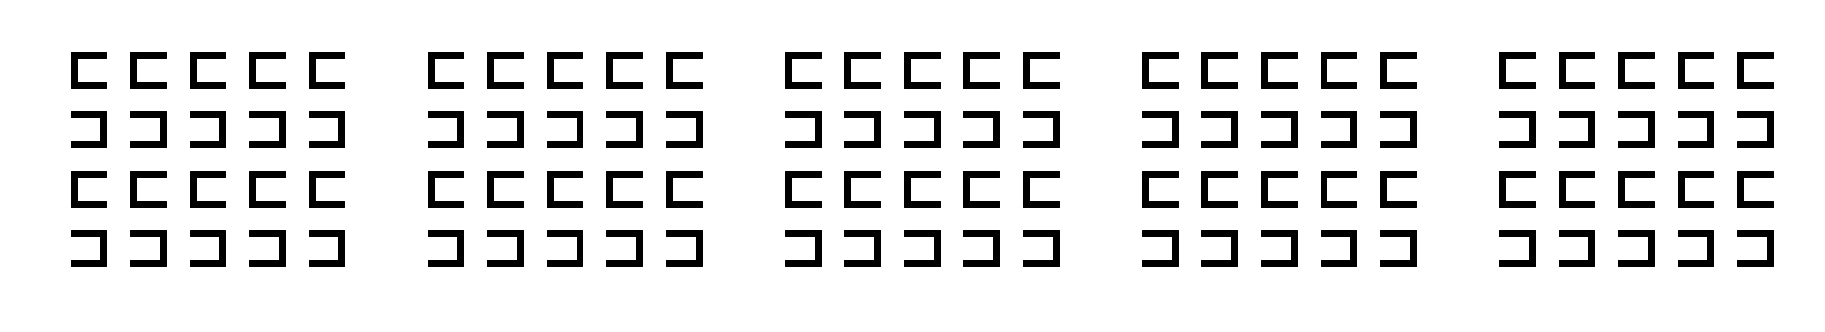

In [80]:
#guarda por columna resonadores en secuencias de configuraciones complementarias
cols1 = [angle_to_byte(a) for a in [-90,90,-90,90]]
c1 = make_config(value=cols1,clase='col')
plot_scr(c1.flatten())
cols2 = [angle_to_byte(a) for a in [90,-90,90,-90]]
c2 = make_config(value=cols2,clase='col')
plot_scr(c2.flatten())
save_config([c1,c2], configname(6), sequence=True)

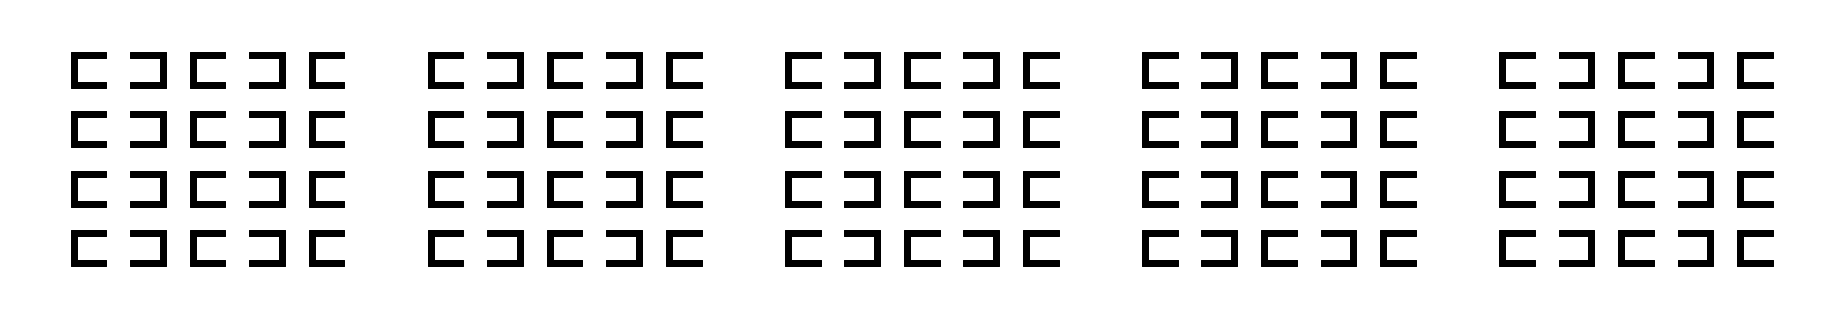

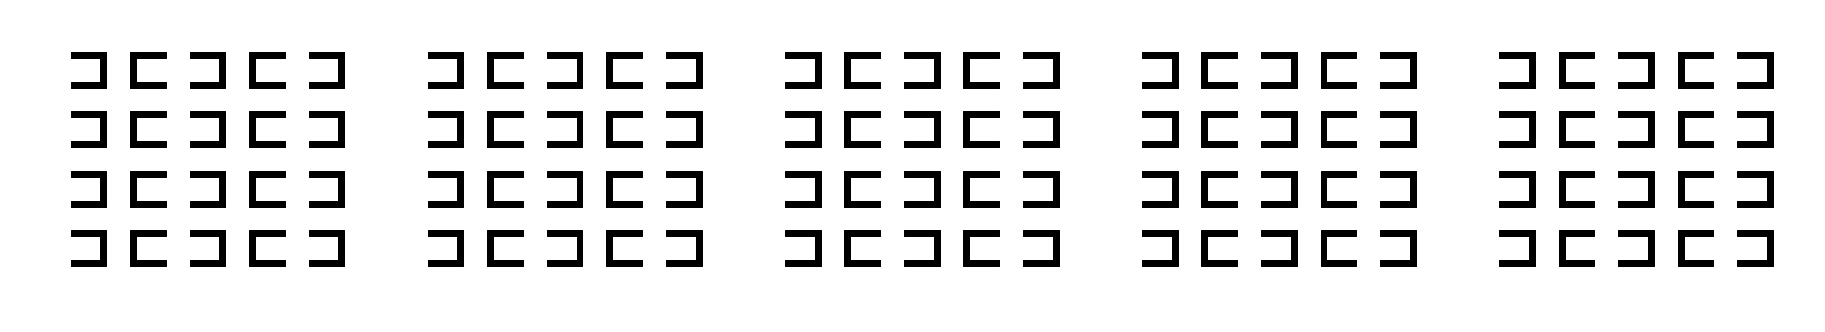

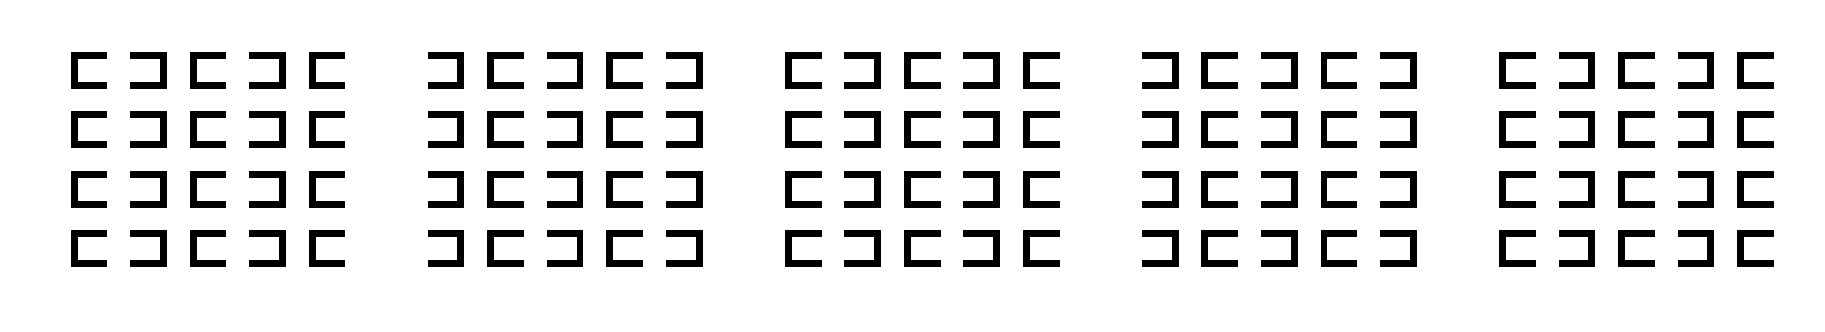

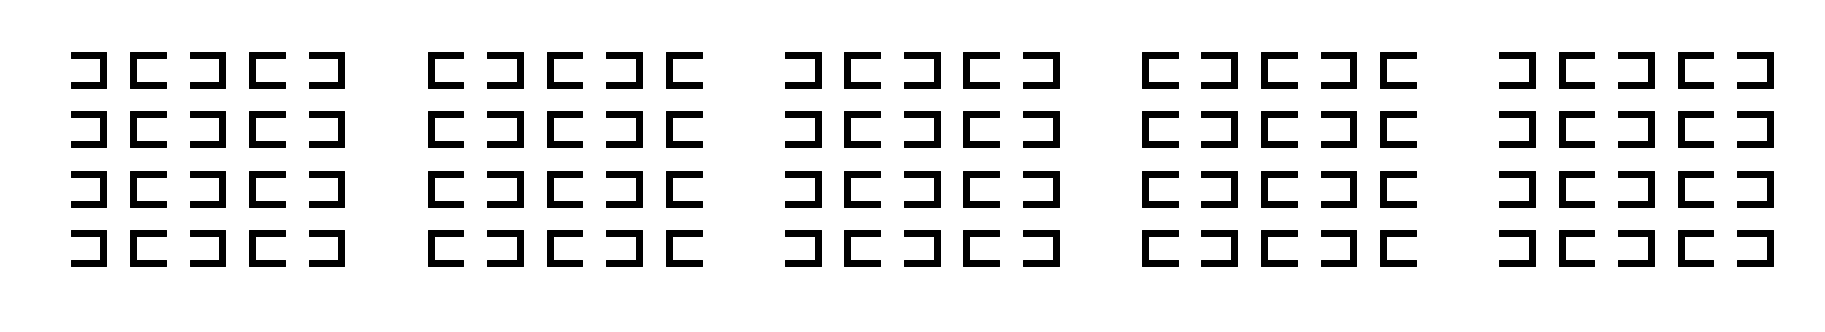

In [81]:
# guarda por fila Resonadores para un lado y para el otro individuales por modulo (7) y encadenados (8)
cols1 = [angle_to_byte(a) for a in [-90,90,-90,90,-90]]
c1 = make_config(value=cols1,clase='row')
plot_scr(c1.flatten())
cols2 = [angle_to_byte(a) for a in [90,-90,90,-90,90]]
c2 = make_config(value=cols2,clase='row')
plot_scr(c2.flatten())
save_config([c1,c2], configname(7), sequence = True)
c1 = make_config(value=cols1, mod=[0,2,4],clase='row')
c2 = make_config(value=cols2, mod=[1,3],clase='row')
c3 = c1 + c2
plot_scr(c3.flatten())
c1 = make_config(value=cols2, mod=[0,2,4],clase='row')
c2 = make_config(value=cols1, mod=[1,3],clase='row')
c4 = c1 + c2
plot_scr(c4.flatten())
save_config([c3,c4], configname(8), sequence = True)

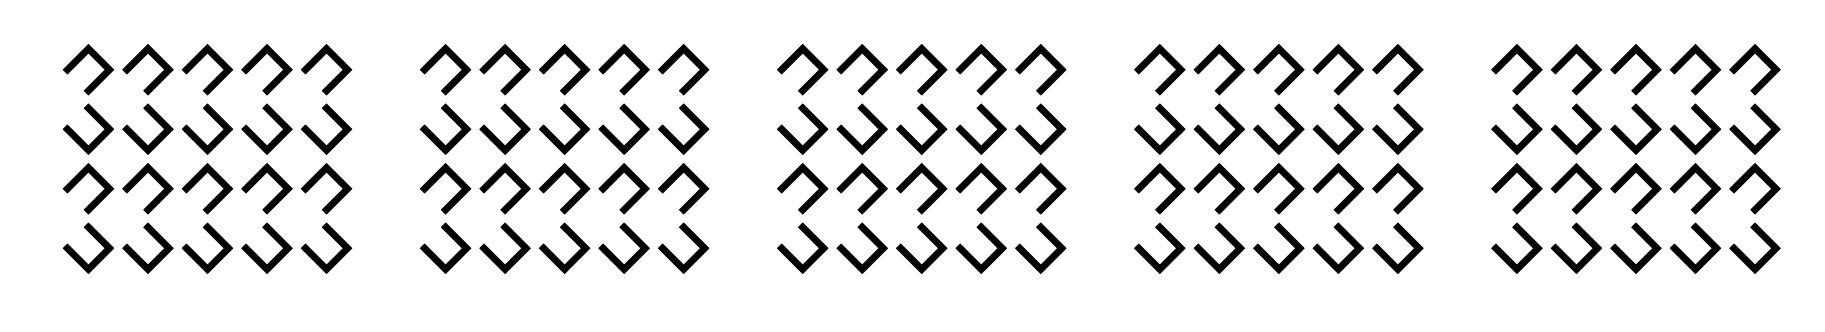

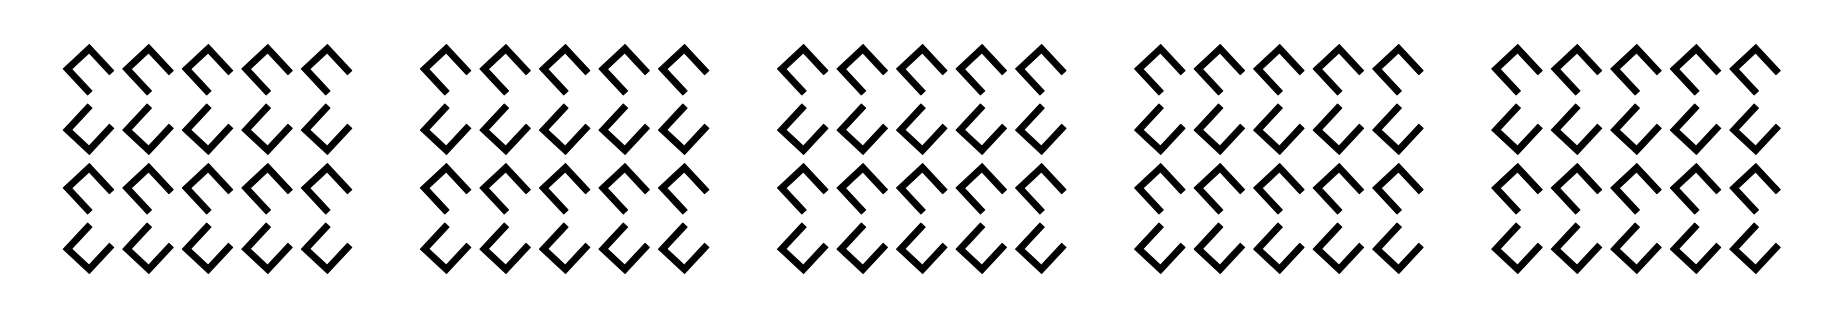

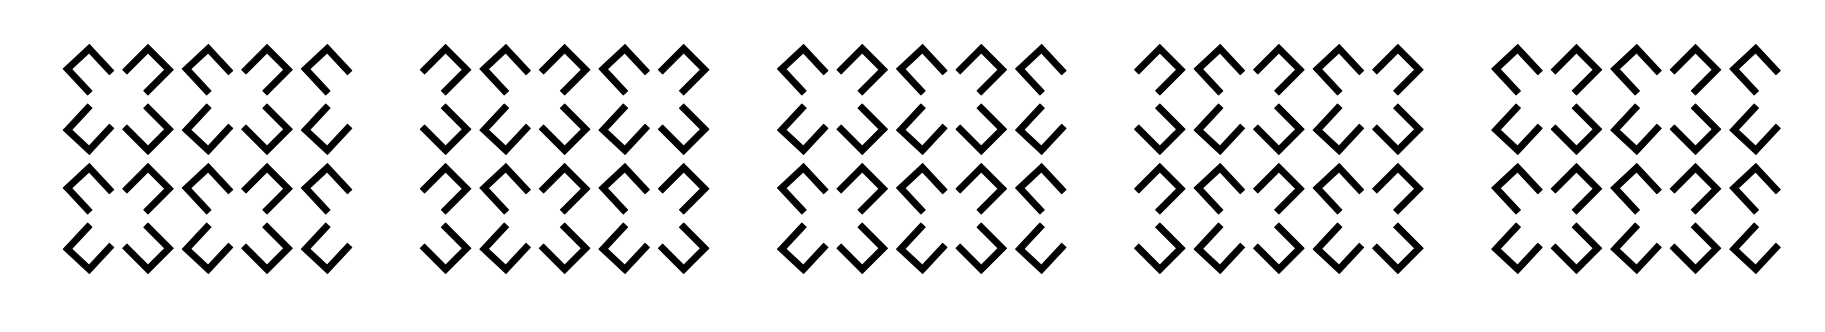

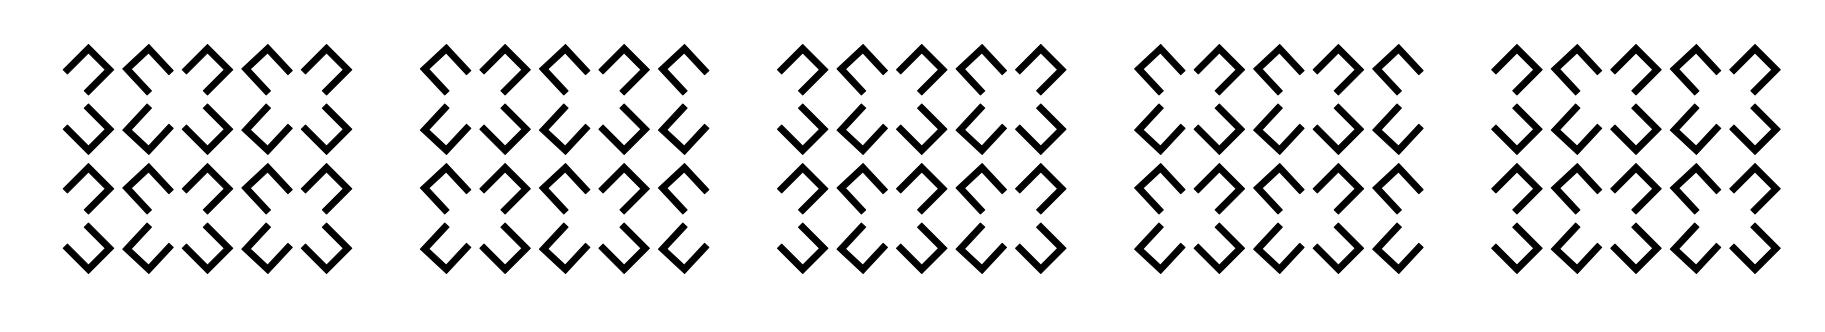

In [275]:
# guarda por columna cruces
cols = [angle_to_byte(a) for a in [-45,45,-45,45]]
c1 = make_config(value=cols,clase='col')
plot_scr(c1.flatten())
cols = [angle_to_byte(a) for a in [-135,135,-135,135]]
c2 = make_config(value=cols,clase='col')
plot_scr(c2.flatten())
save_config([c1,c2], configname(9), sequence=True)
cols1 = [angle_to_byte(a) for a in [-135,-45,135,45,-135,-45,135,45]]
c1 = make_config(value=cols1,mod=[0,2,4],clase='col12')
cols2 = [angle_to_byte(a) for a in [-45,-135,45,135,-45,-135,45,135]]
c2 = make_config(value=cols2,mod=[1,3],clase='col12')
c3 = c1+c2
plot_scr(c3.flatten())
c1 = make_config(value=cols2,mod=[0,2,4],clase='col12')
c2 = make_config(value=cols1,mod=[1,3],clase='col12')
c4 = c1+c2
plot_scr(c4.flatten())
save_config([c3,c4], configname(10), sequence=True)

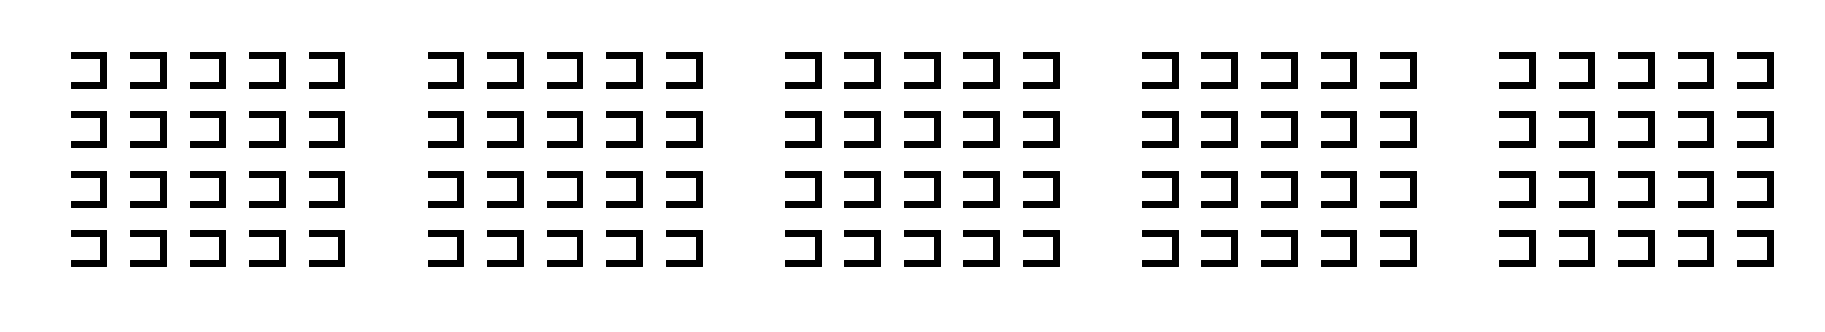

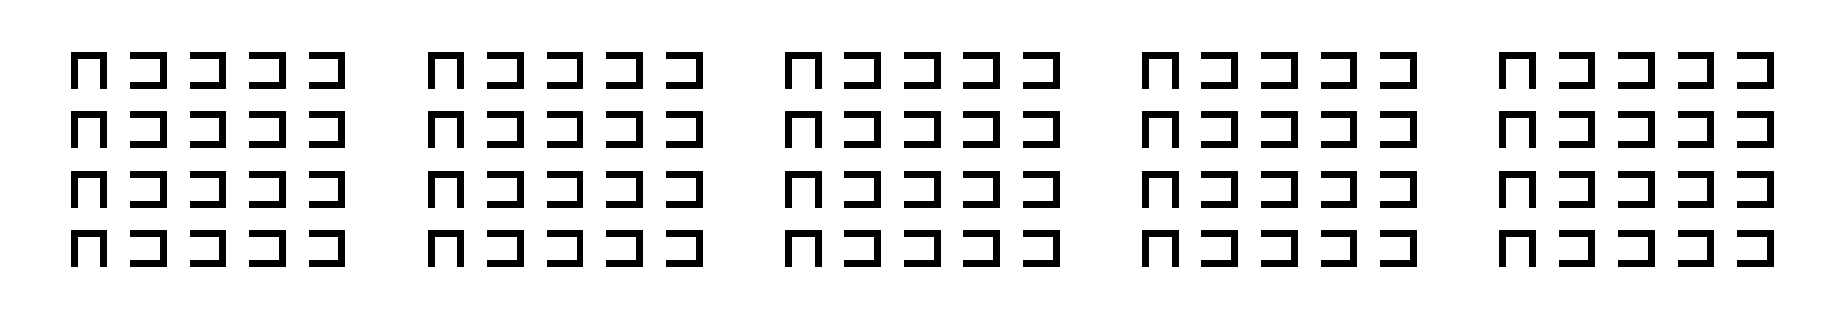

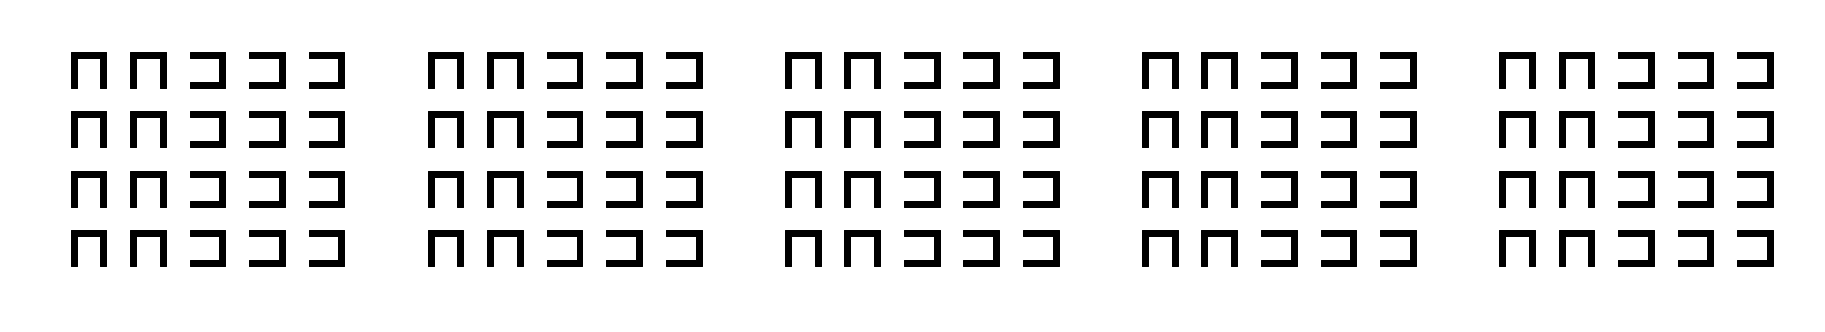

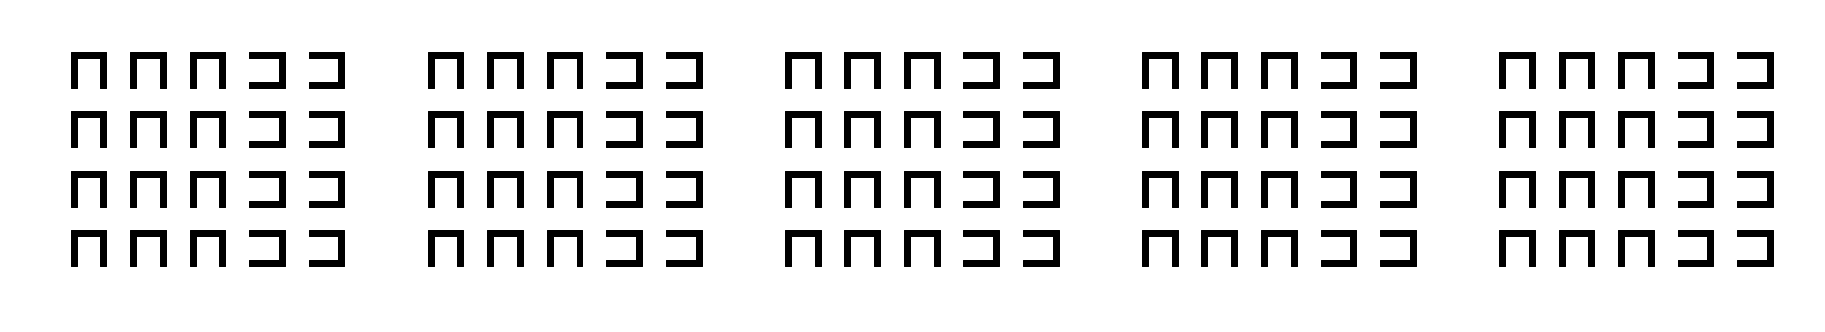

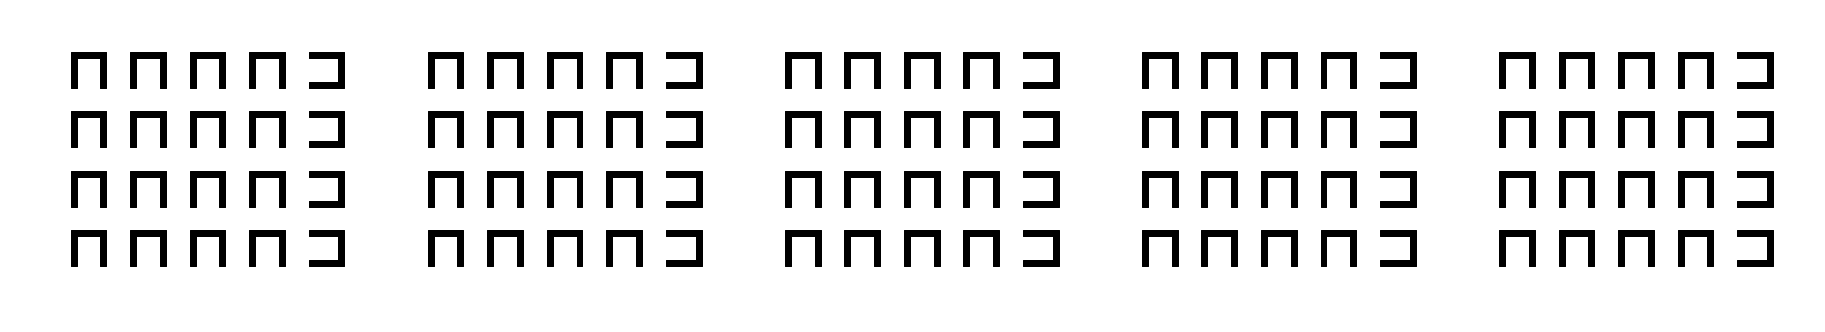

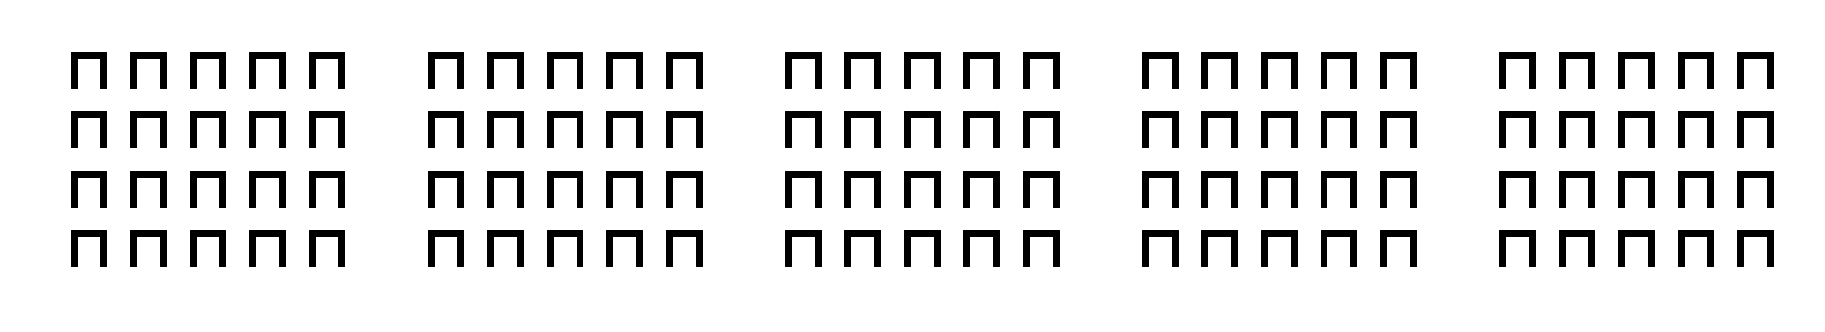

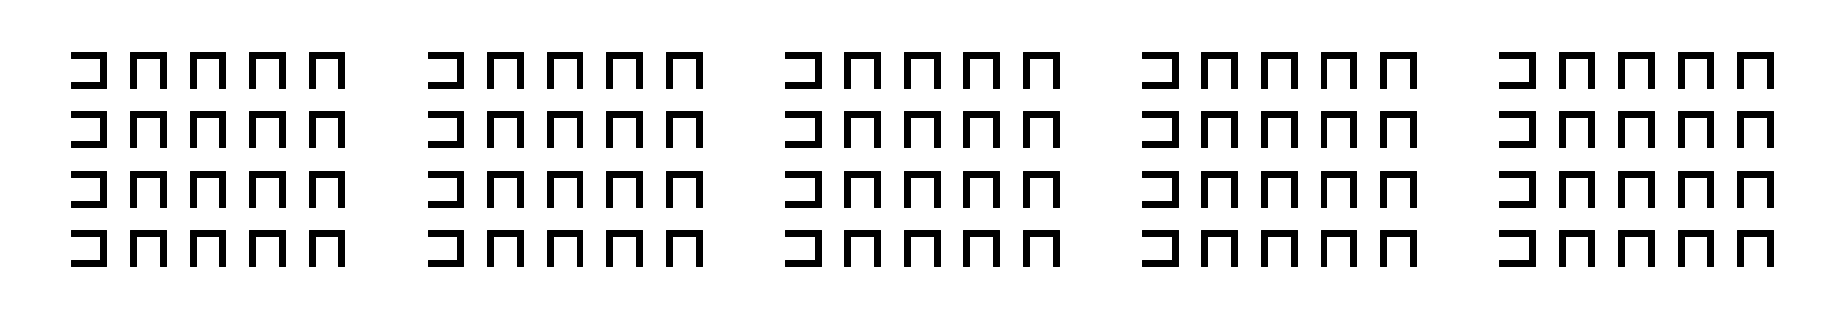

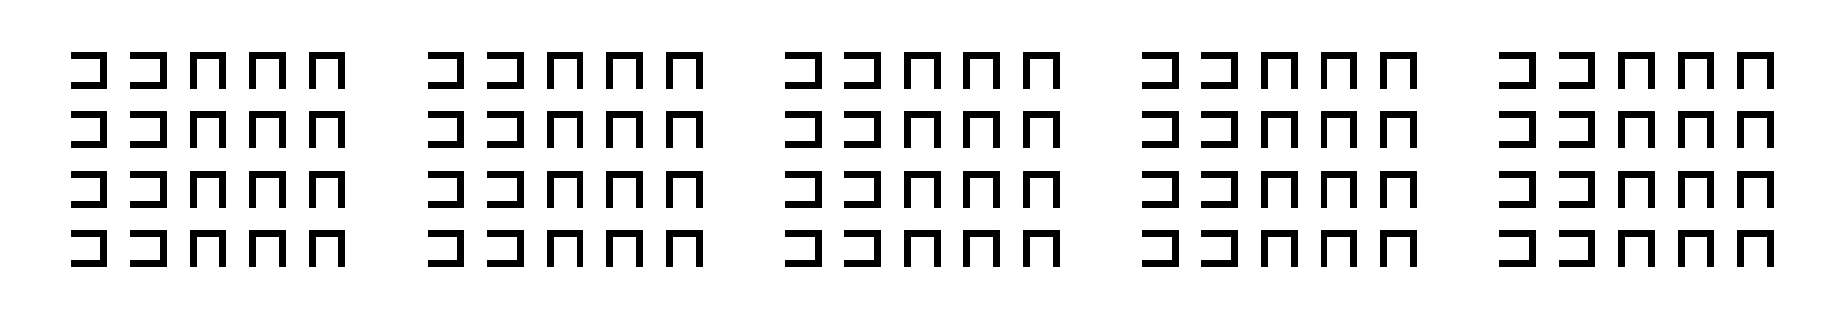

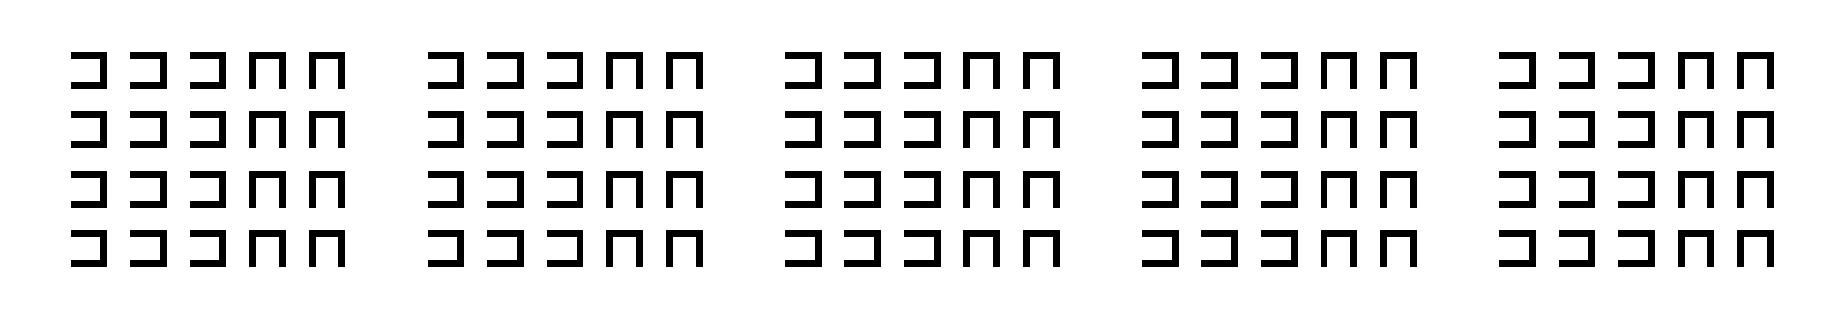

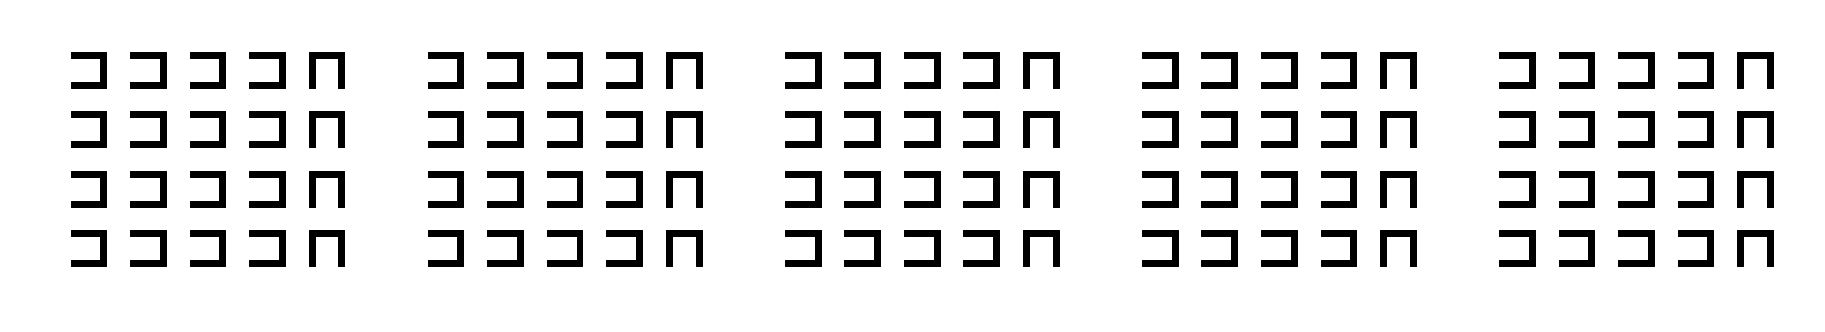

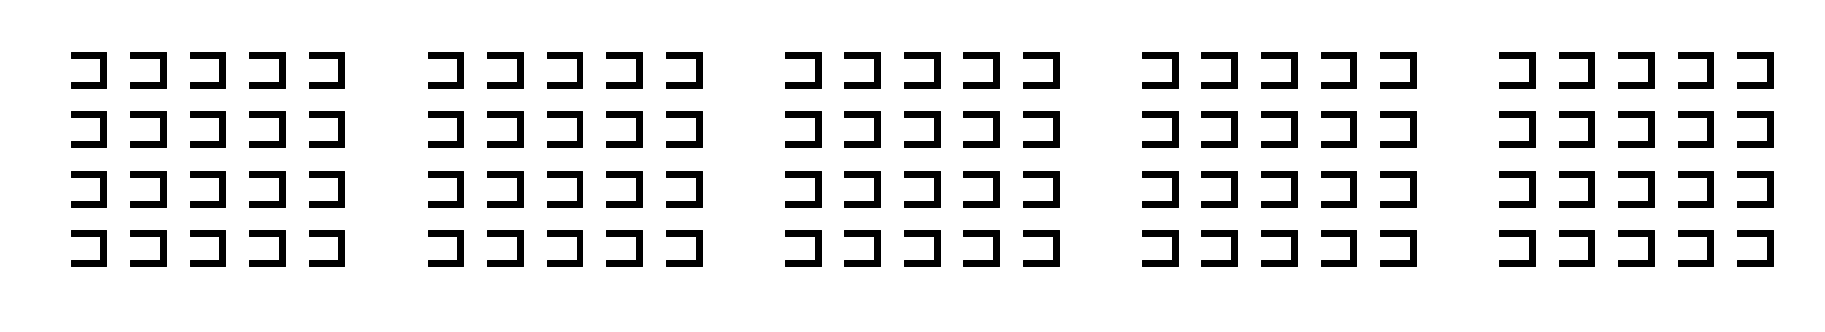

In [276]:
# Barrido por filas de 1 a 5
c = load_config(configname(0))
rows = [angle_to_byte(a) for a in [90,0,0,0,0]]
clist = [c['values']]
plot_scr(c['values'].flatten())
for n in range(5):
    rows[n] = angle_to_byte(90)
    c = make_config(value=rows,clase='row')
    clist.append(c)
    plot_scr(c.flatten())
for n in range(5):
    rows[n] = angle_to_byte(0)
    c = make_config(value=rows,clase='row')
    clist.append(c)
    plot_scr(c.flatten())    
save_config(clist, configname(14), sequence = True)

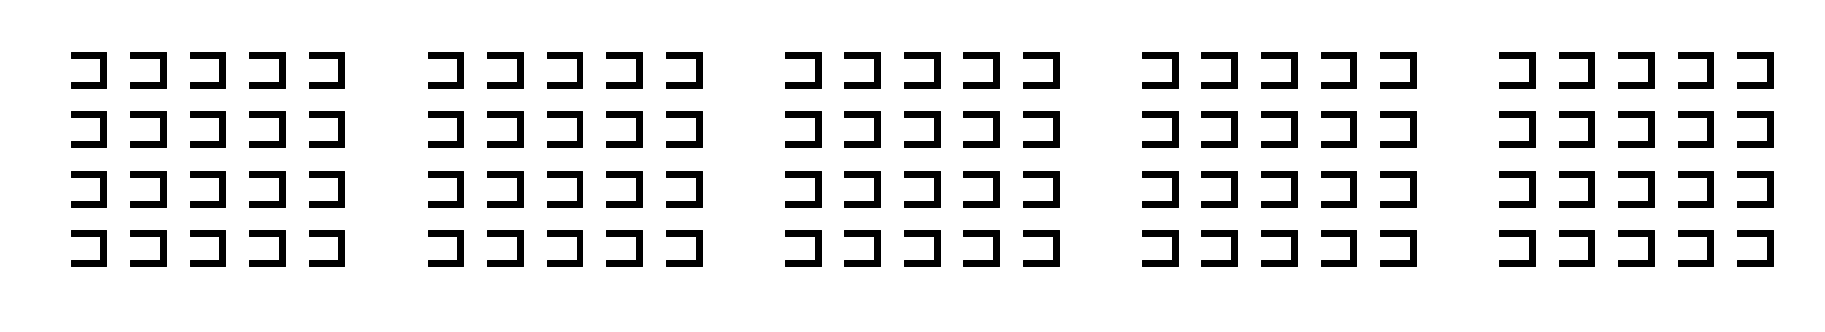

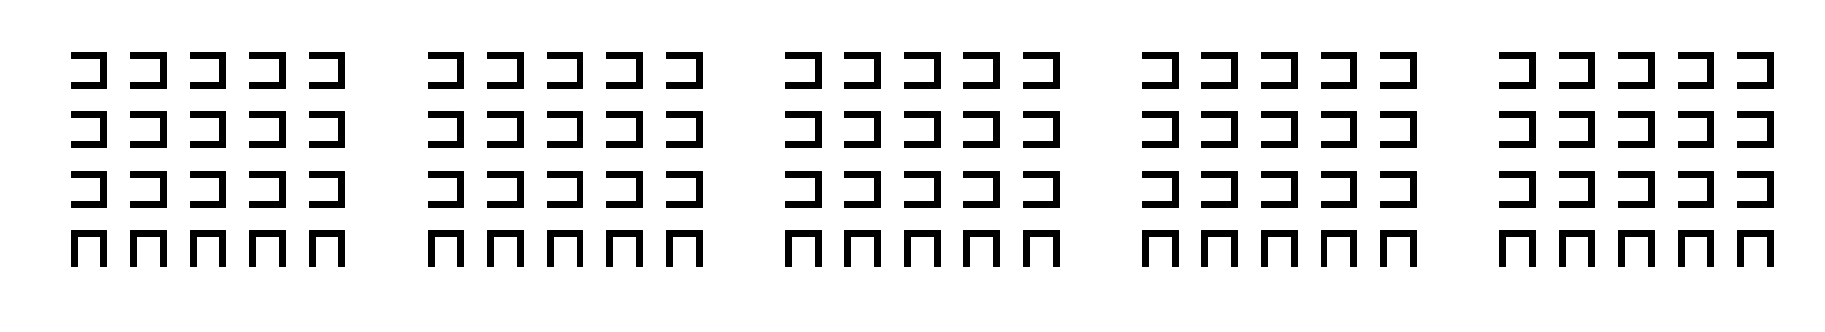

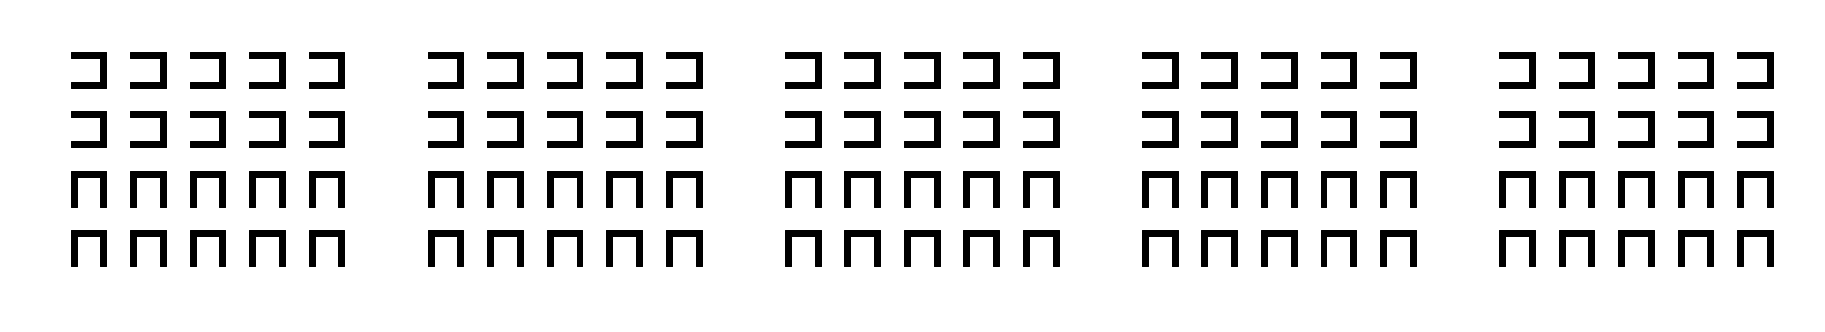

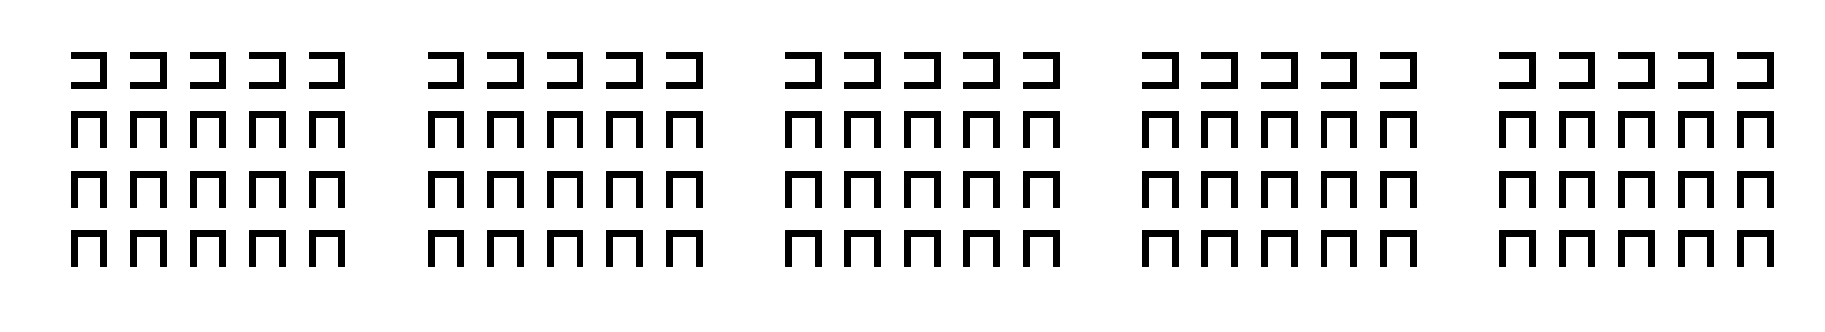

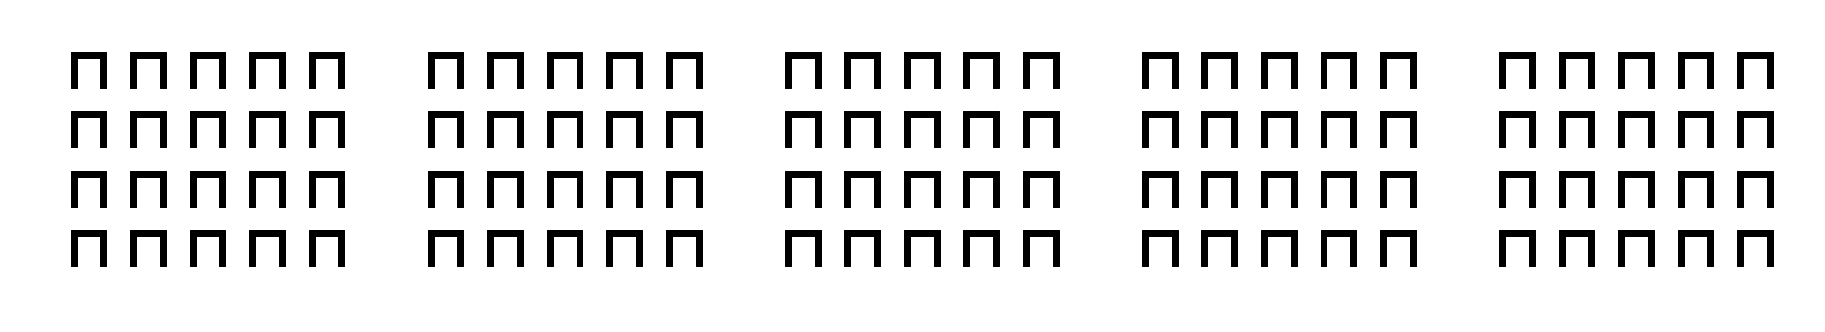

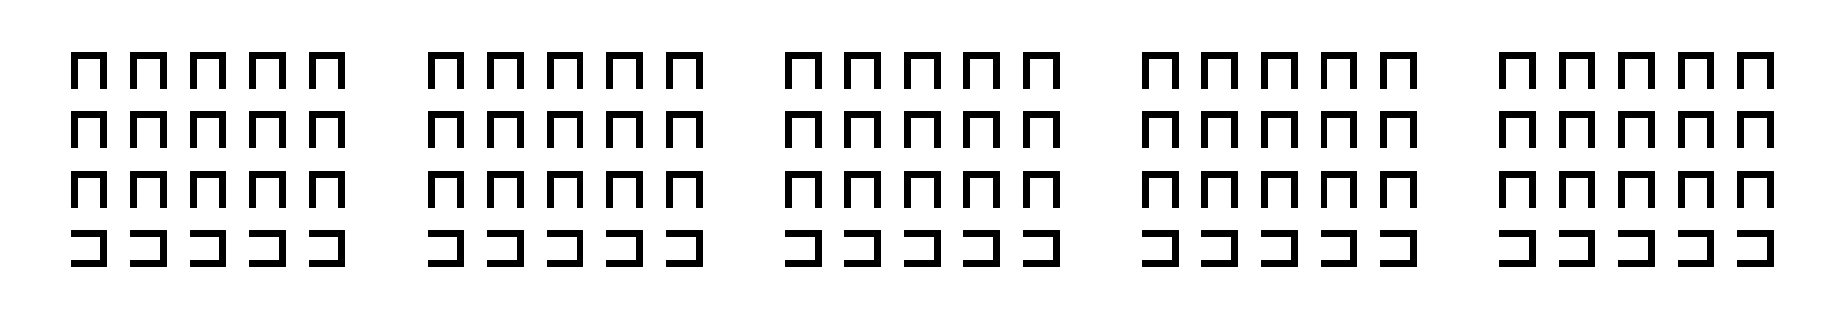

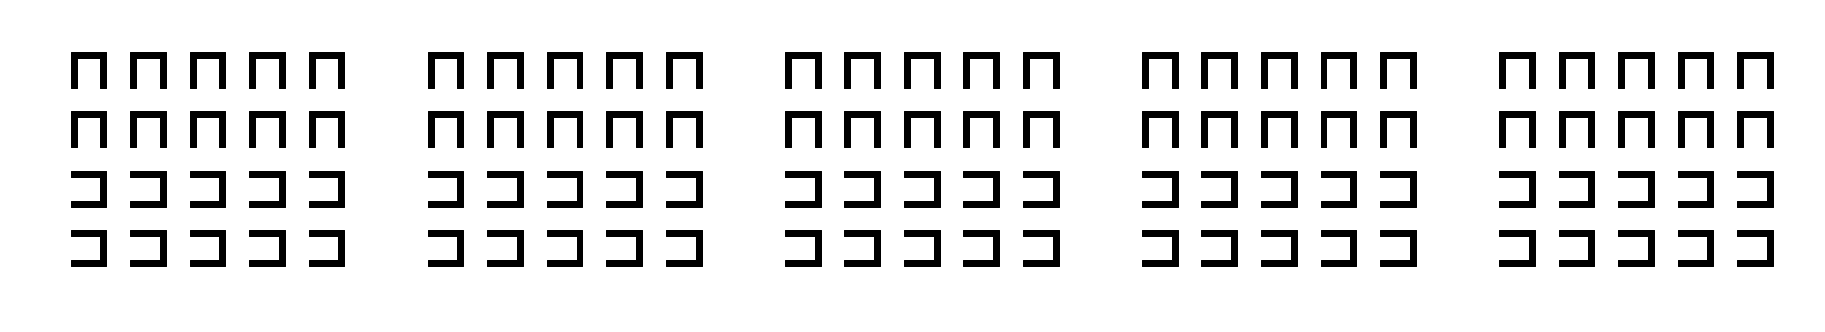

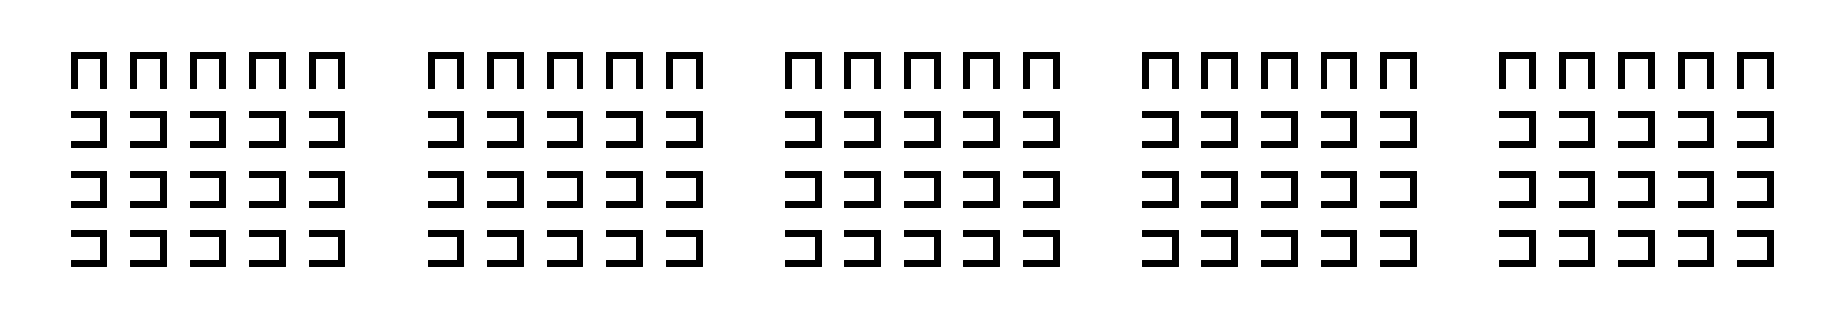

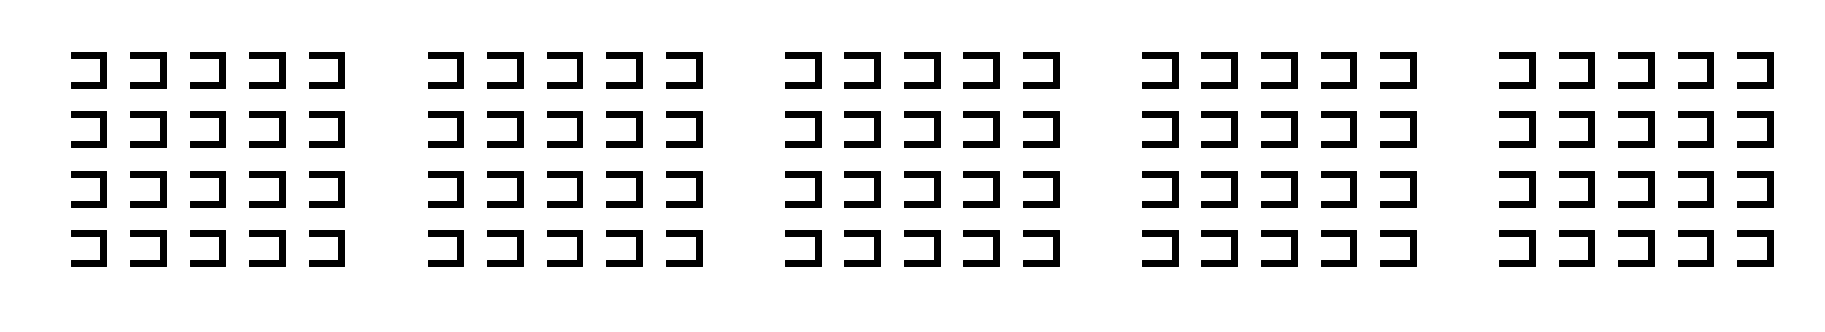

In [277]:
# Barrido por filas de 1 a 5
c = load_config(configname(0))
cols = [angle_to_byte(a) for a in [90,0,0,0]]
clist = [c['values']]
plot_scr(c['values'].flatten())
for n in range(4):
    cols[n] = angle_to_byte(90)
    c = make_config(value=cols,clase='col')
    clist.append(c)
    plot_scr(c.flatten())
for n in range(4):
    cols[n] = angle_to_byte(0)
    c = make_config(value=cols,clase='col')
    clist.append(c)
    plot_scr(c.flatten())    
save_config(clist, configname(16), sequence = True)

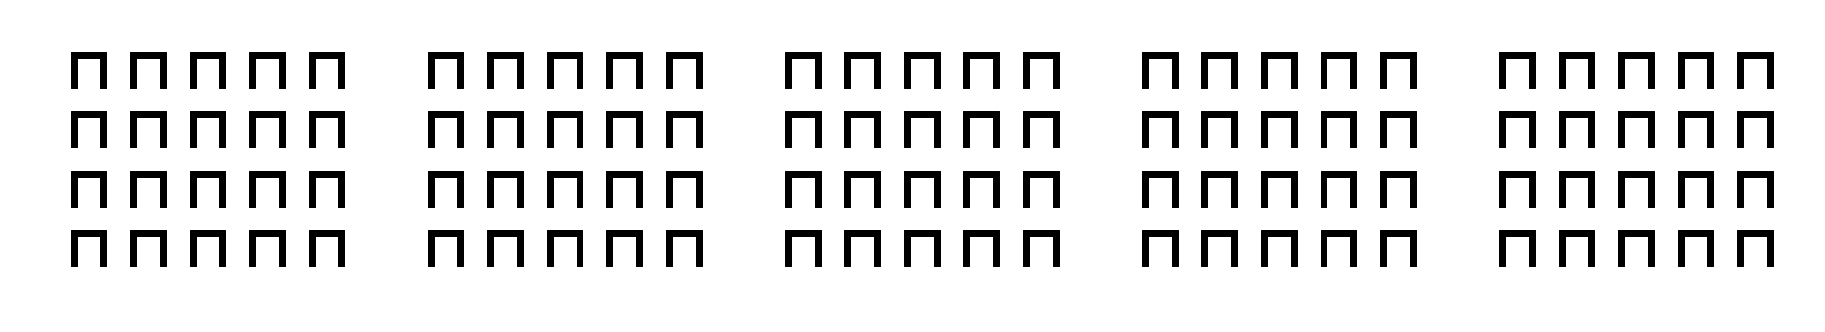

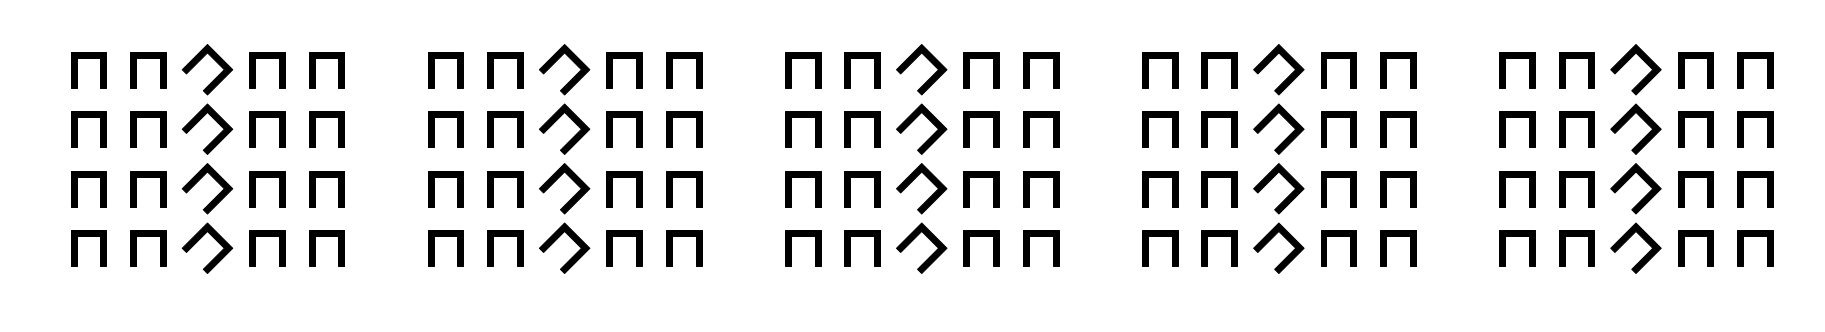

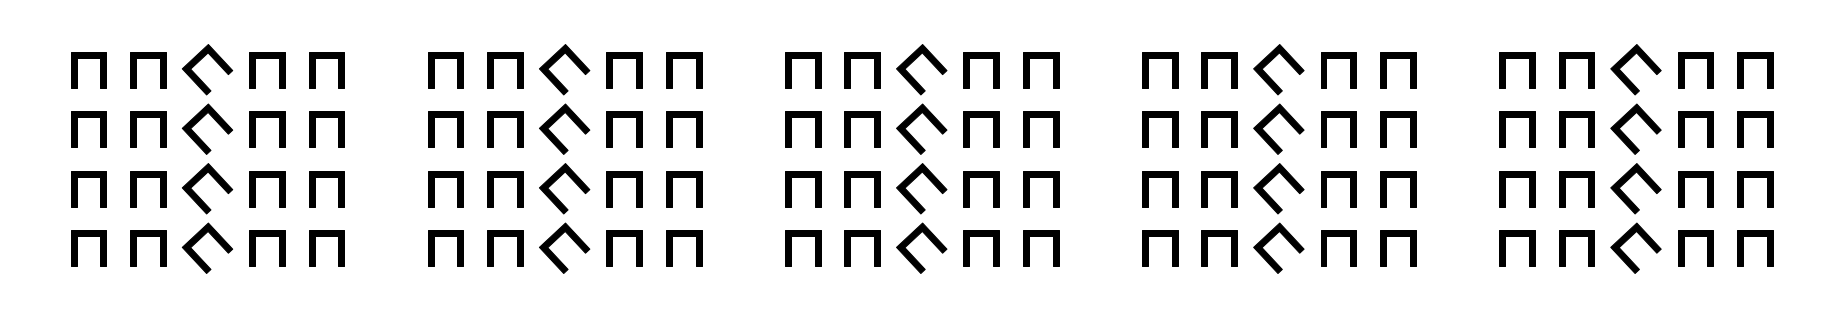

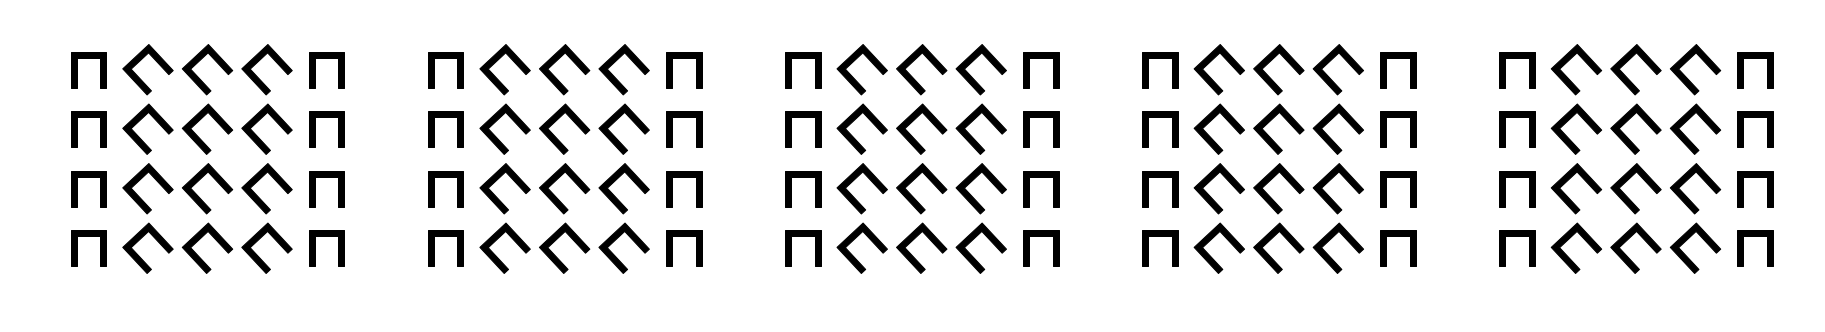

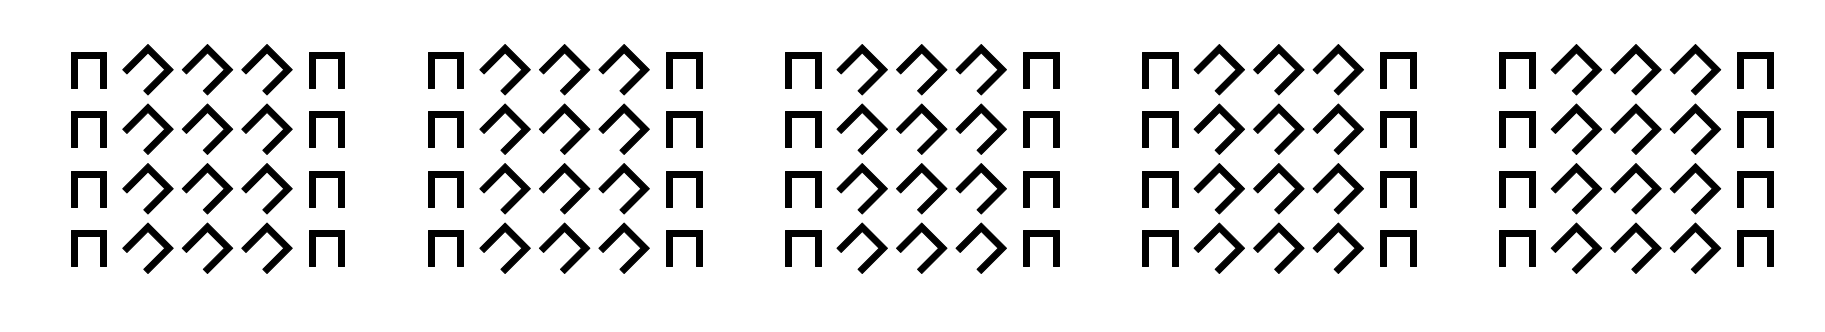

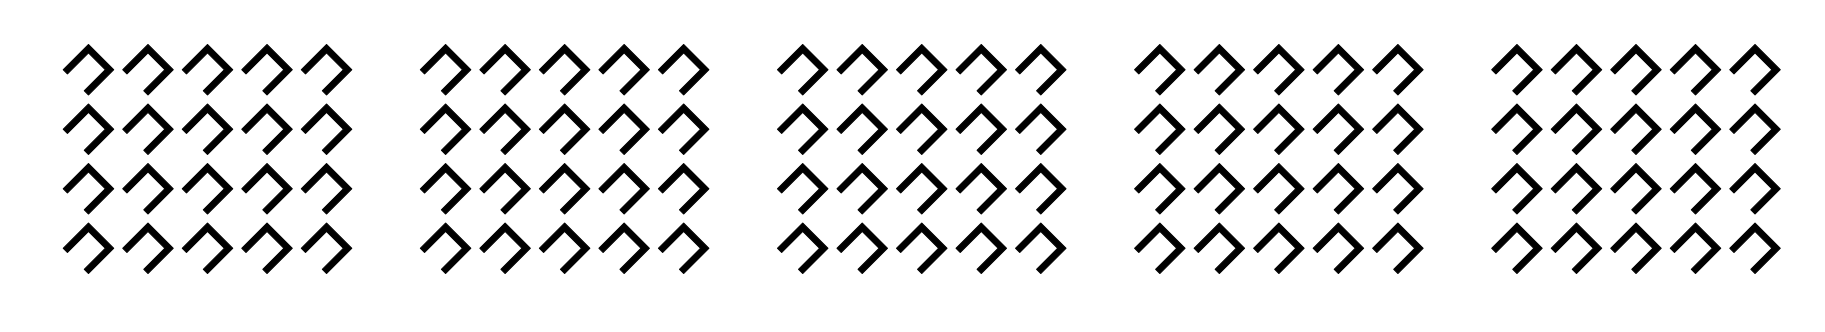

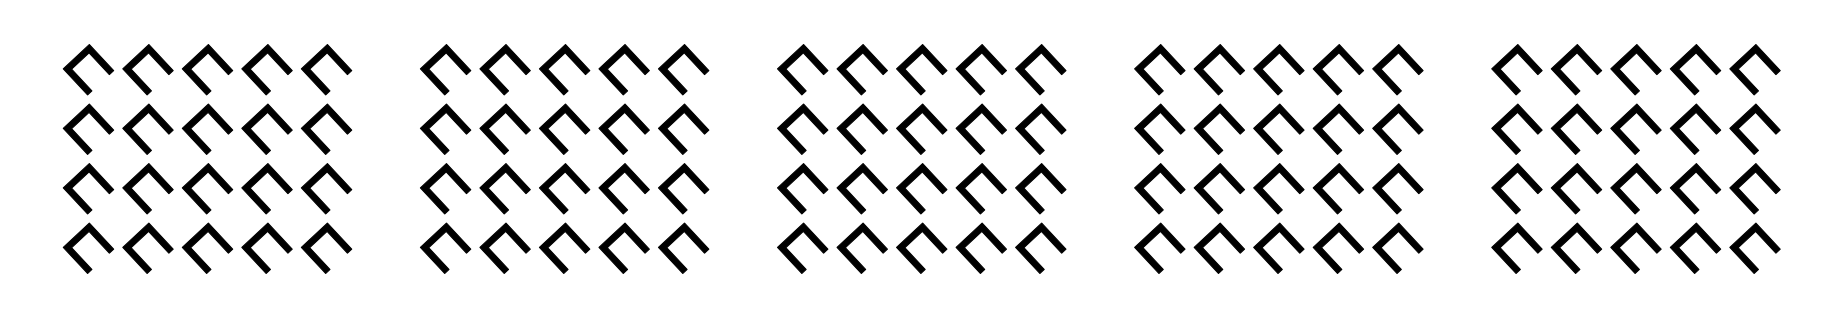

In [143]:
# Barrido por filas del centro afuera vaiven
rows = []
clist = []
rows.append([angle_to_byte(a) for a in [90,90,45,90,90]])
rows.append([angle_to_byte(a) for a in [90,90,135,90,90]])
rows.append([angle_to_byte(a) for a in [90,135,135,135,90]])
rows.append([angle_to_byte(a) for a in [90,45,45,45,90]])
rows.append([angle_to_byte(a) for a in [45,45,45,45,45]])
rows.append([angle_to_byte(a) for a in [135,135,135,135,135]])
cdict = load_config(configname(2))
c = cdict['values']
clist.append(c)
plot_scr(c.flatten())
for n in range(6):
    c = make_config(value=rows[n],clase='row')
    plot_scr(c.flatten())
    clist.append(c)
save_config(clist, configname(12), sequence = True)

## Configuraciones RGB

In [128]:
# crea secuencia RGB
c = make_config([[255,0,0,10],[0,255,0,0],[0,0,255,0],[120,120,0,0]], clase='col', mod=0, tipo='rgb')
save_config(c,configname(8,tipo='rgb'))

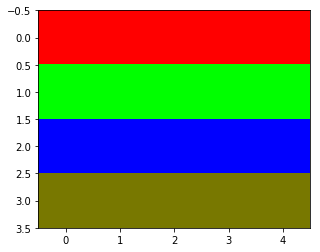

In [129]:
m = c[1,:,:3].reshape((4,5,3))
plt.imshow(m.astype(np.uint8))

## Envio de configuraciones

Sending 192.168.0.11 [0, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]
Sending 192.168.0.12 [0, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]
Sending 192.168.0.13 [0, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]
Sending 192.168.0.14 [0, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]
Sending 192.168.0.15 [0, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42]


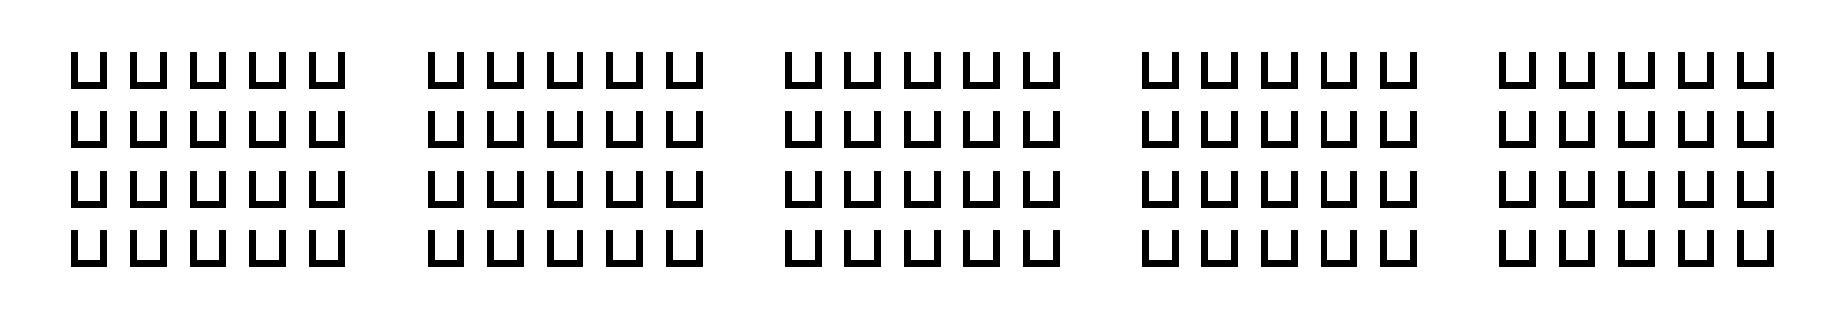

In [229]:
# Envio de configuracion estatica a todos los modulos
c = load_config(configname(1))
send_config(c,plot=True)

Sending 192.168.0.12 [0, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171]
Sending 192.168.0.15 [0, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171, 171]
Sending 192.168.0.11 [0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]
Sending 192.168.0.14 [0, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]
Sending 192.168.0.13 [0, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214]


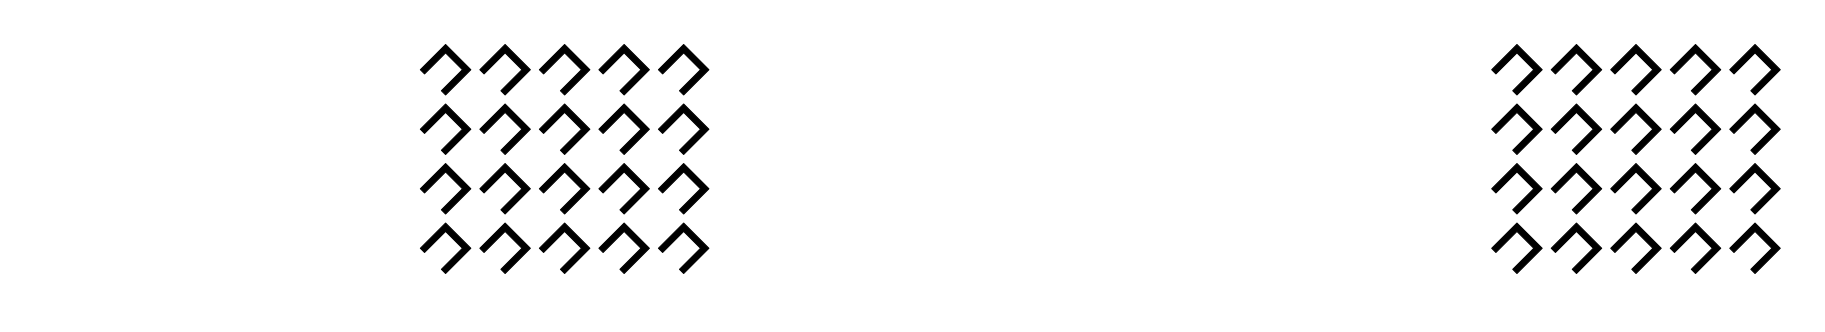

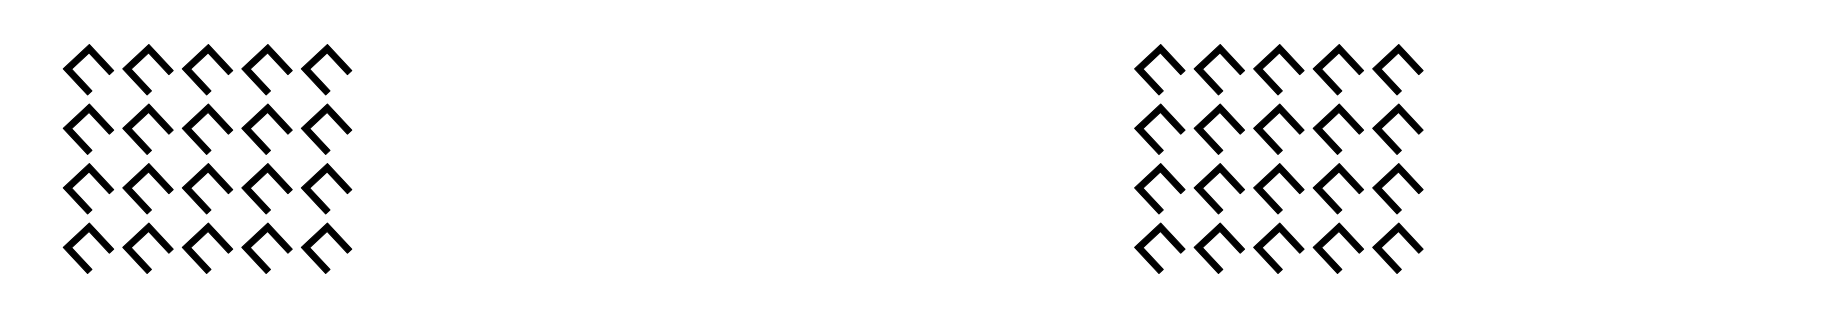

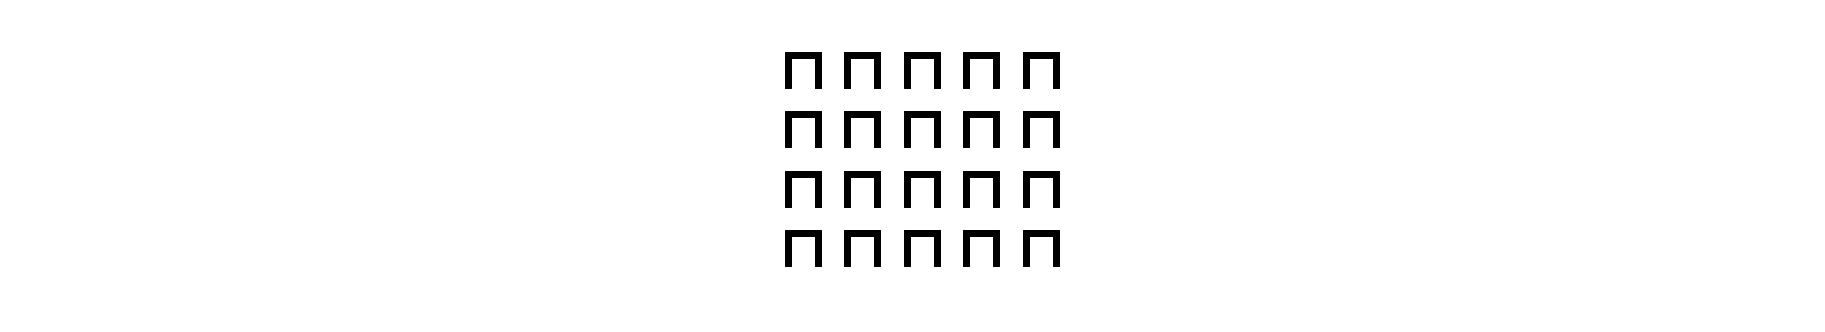

In [257]:
#envio de secuencia a algunos modulos esto reemplaza el send_conf_list es mas claro
c = load_config(configname(4))
send_config(c,nmod=[1,4],plot=True)
c = load_config(configname(5))
send_config(c,nmod=[0,3],plot=True)
c = load_config(configname(2))
send_config(c,nmod=[2],plot=True)

Sending 192.168.0.11 [0, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214]
Sending 192.168.0.12 [0, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214]
Sending 192.168.0.13 [0, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214]
Sending 192.168.0.14 [0, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214]
Sending 192.168.0.15 [0, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214, 214]

Sending 192.168.0.11 [0, 128, 214, 214, 214, 214, 128, 214, 214, 214, 214, 128, 214, 214, 214, 214, 128, 214, 214, 214, 214]
Sending 192.168.0.12 [0, 128, 214, 214, 214, 214, 128, 214, 214, 214, 214, 128, 214, 214, 214, 214, 128, 214, 214, 214, 214]
Sending 192.168.0.13 [0, 128, 214, 214, 214, 214, 128, 214, 214, 214, 214, 128, 214, 214, 214, 214, 128, 214, 214, 214, 214]

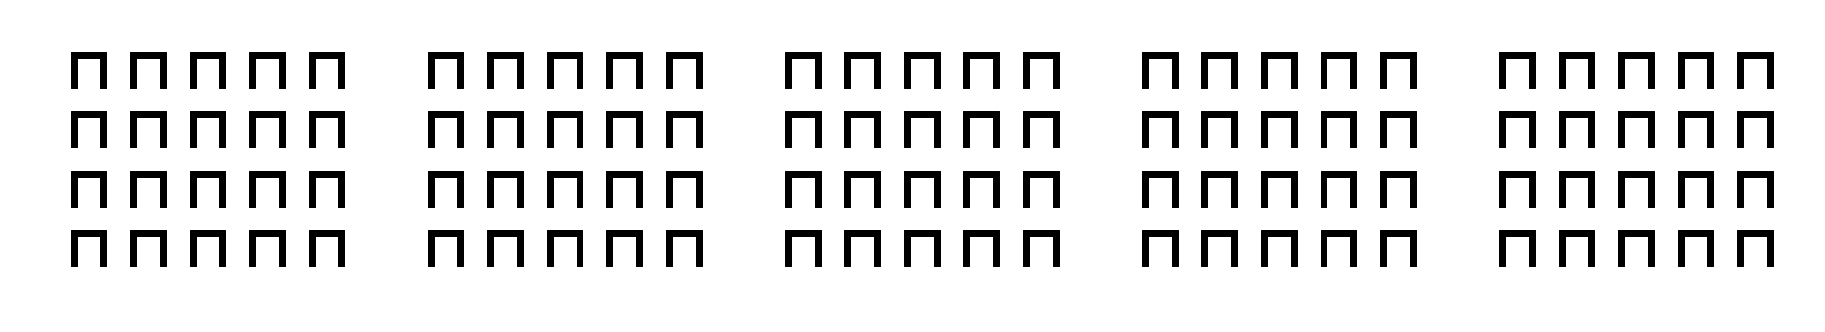

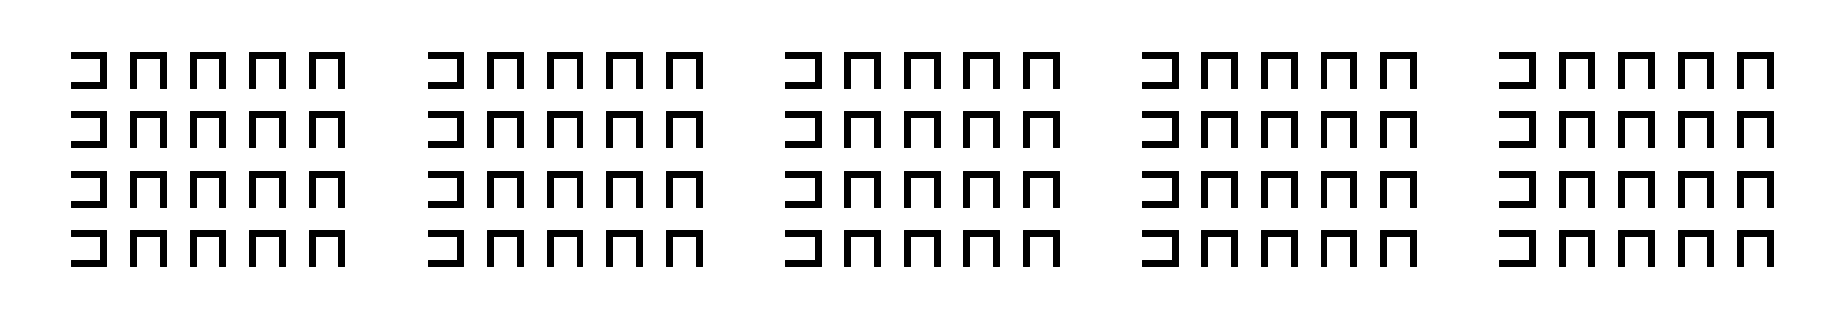

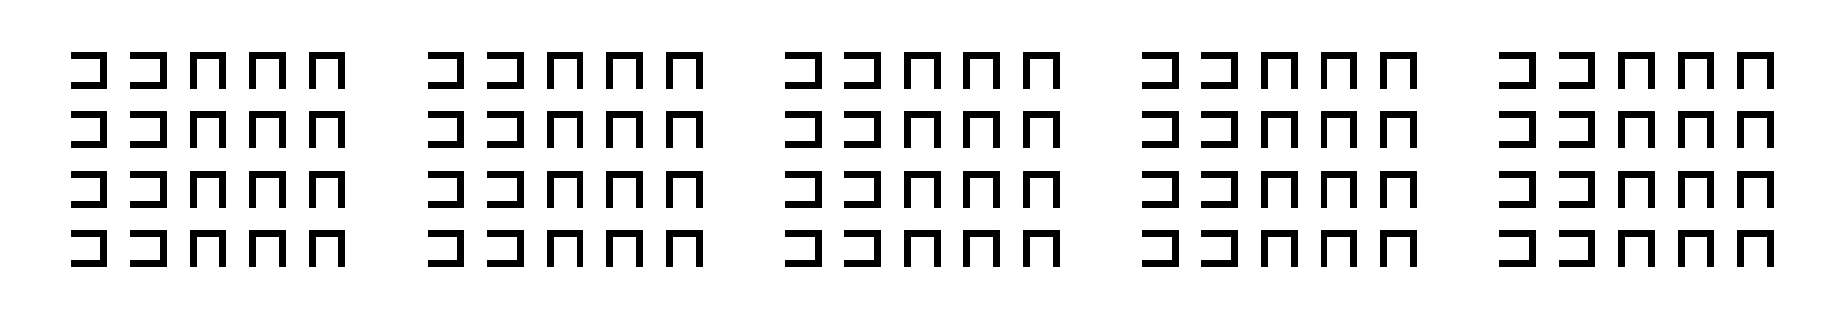

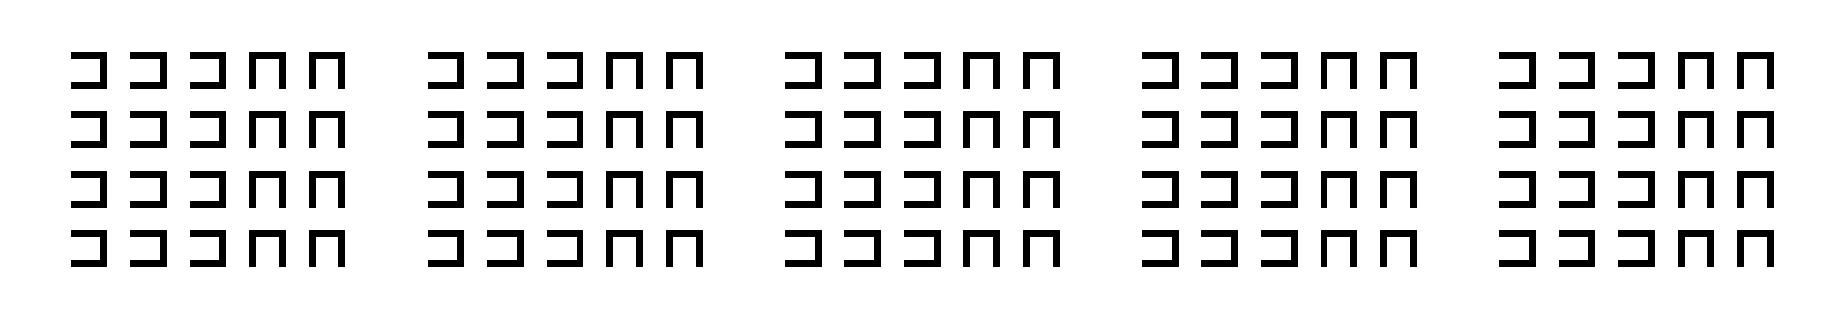

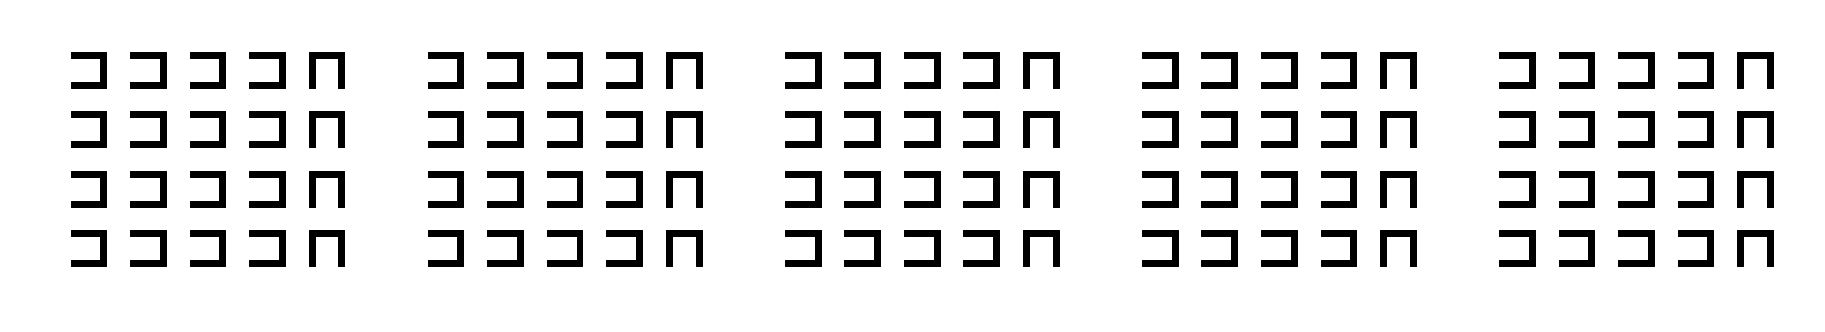

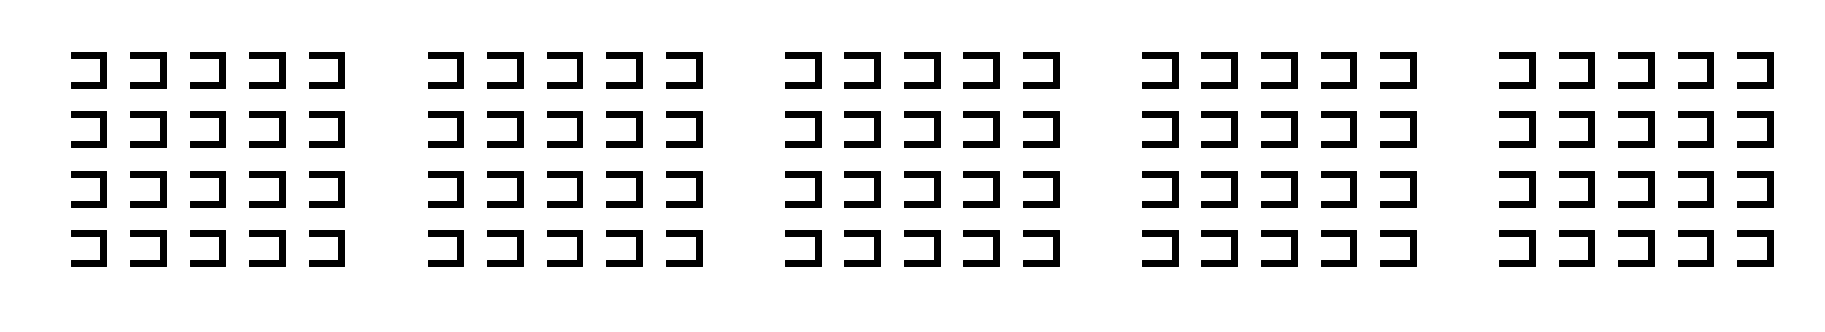

In [274]:
# Envio de secuencia de configuraciones a todos los modulos espera por Enter (sin delay)
c = load_config(configname(11))
send_config(c[:6],plot=True)

In [237]:
# Envio de secuencia de configuraciones a todos los modulos con Delay fijo
c = load_config(configname(6))
send_config(c,delay=10)

Sending 192.168.0.11 [0, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214]
Sending 192.168.0.12 [0, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214]
Sending 192.168.0.13 [0, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214]
Sending 192.168.0.14 [0, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214]
Sending 192.168.0.15 [0, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214]
Sending 192.168.0.11 [0, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42]
Sending 192.168.0.12 [0, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42]
Sending 192.168.0.13 [0, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42]
Sending 192.168.0.14 [0, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 

In [242]:
send_config_loop(c,delay=10,nloop=3)

Sending 192.168.0.11 [0, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214]
Sending 192.168.0.12 [0, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214]
Sending 192.168.0.13 [0, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214]
Sending 192.168.0.14 [0, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214]
Sending 192.168.0.15 [0, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214]
Sending 192.168.0.11 [0, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42]
Sending 192.168.0.12 [0, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42]
Sending 192.168.0.13 [0, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42]
Sending 192.168.0.14 [0, 214, 214, 214, 214, 214, 42, 42, 42, 42, 42, 214, 214, 

In [267]:
%run scr_control.py

## Configuraciones Random y paso con mascara random

Sending 192.168.0.11 [0, 229, 133, 220, 236, 67, 252, 224, 76, 164, 217, 20, 4, 75, 234, 243, 54, 246, 4, 122, 138]
Sending 192.168.0.12 [0, 224, 169, 190, 94, 153, 121, 142, 30, 93, 142, 71, 218, 80, 226, 43, 132, 188, 196, 221, 90]
Sending 192.168.0.13 [0, 29, 64, 228, 156, 84, 58, 33, 68, 195, 154, 248, 231, 201, 24, 231, 76, 94, 153, 163, 117]
Sending 192.168.0.14 [0, 149, 2, 157, 230, 4, 230, 124, 28, 227, 91, 21, 165, 157, 159, 16, 174, 101, 71, 79, 6]
Sending 192.168.0.15 [0, 19, 131, 115, 204, 7, 6, 114, 223, 122, 70, 125, 37, 173, 84, 67, 193, 131, 82, 6, 232]


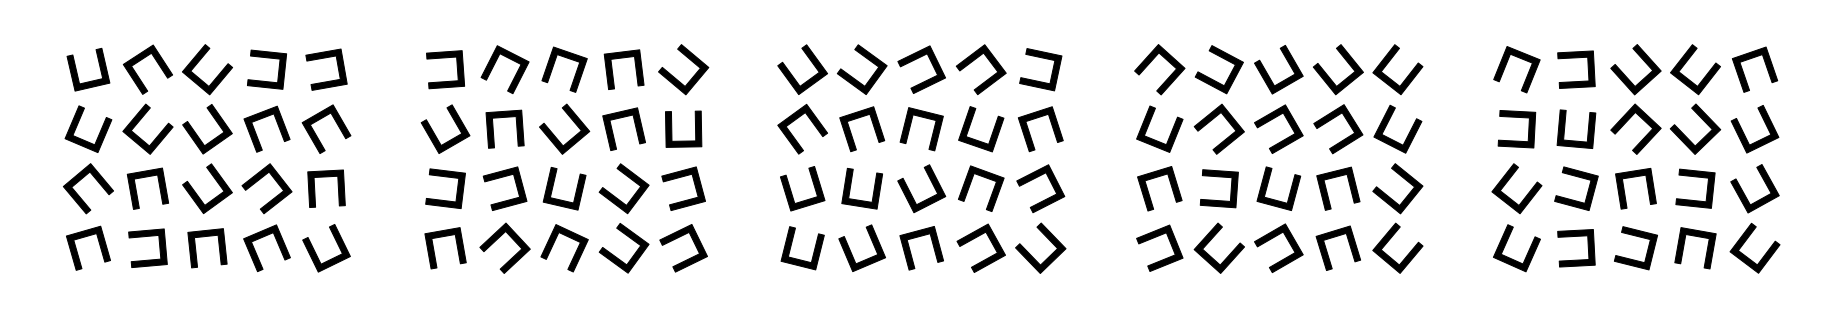

In [263]:
send_rand_config(plot=True)

Sending 192.168.0.11 [0, 85, 0, 0, 0, 0, 0, 0, 85, 0, 0, 0, 0, 0, 85, 0, 0, 85, 0, 0, 0]
Sending 192.168.0.12 [0, 0, 0, 0, 0, 85, 0, 0, 85, 0, 0, 0, 0, 85, 0, 0, 0, 0, 85, 0, 0]
Sending 192.168.0.13 [0, 0, 0, 0, 85, 0, 0, 85, 0, 0, 0, 0, 0, 85, 0, 0, 85, 0, 0, 0, 0]
Sending 192.168.0.14 [0, 0, 0, 0, 85, 0, 0, 0, 85, 0, 0, 0, 85, 0, 0, 0, 0, 0, 0, 85, 0]
Sending 192.168.0.15 [0, 0, 85, 0, 0, 0, 85, 0, 0, 0, 0, 0, 0, 0, 85, 0, 0, 0, 0, 0, 85]
Sending 192.168.0.11 [0, 0, 85, 0, 0, 0, 0, 85, 0, 0, 0, 0, 0, 85, 0, 0, 85, 0, 0, 0, 0]
Sending 192.168.0.12 [0, 85, 0, 0, 0, 0, 0, 85, 0, 0, 0, 0, 0, 0, 0, 85, 0, 0, 0, 85, 0]
Sending 192.168.0.13 [0, 0, 0, 85, 0, 0, 85, 0, 0, 0, 0, 0, 0, 0, 85, 0, 0, 85, 0, 0, 0]
Sending 192.168.0.14 [0, 0, 0, 85, 0, 0, 0, 0, 0, 85, 0, 0, 0, 85, 0, 0, 0, 85, 0, 0, 0]
Sending 192.168.0.15 [0, 0, 0, 0, 85, 0, 0, 0, 0, 85, 0, 85, 0, 0, 0, 0, 0, 0, 85, 0, 0]
Sending 192.168.0.11 [0, 0, 0, 85, 0, 0, 0, 0, 0, 0, 85, 85, 0, 0, 0, 0, 0, 0, 0, 85, 0]
Sending 192.168.0.12 

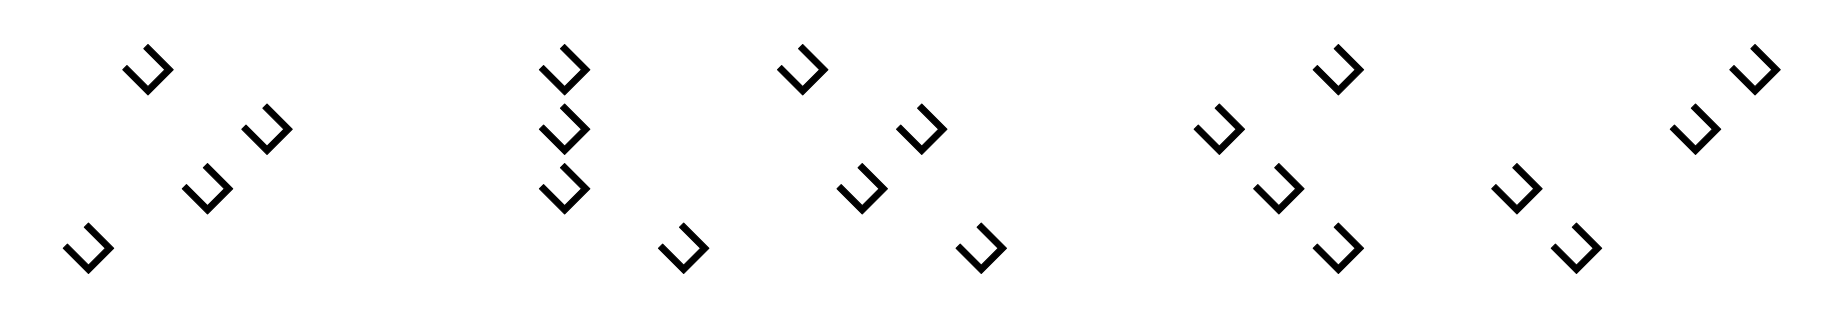

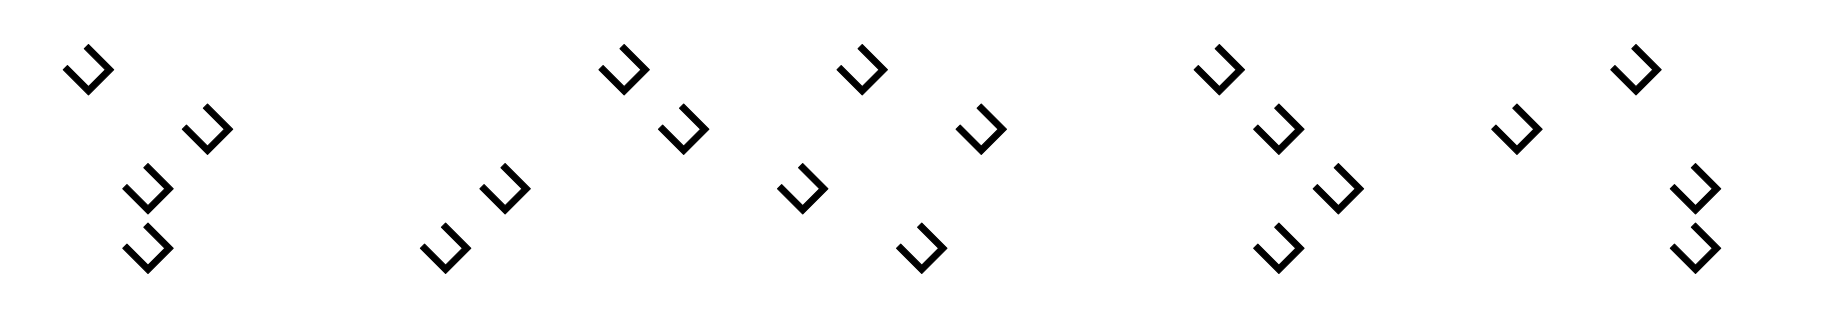

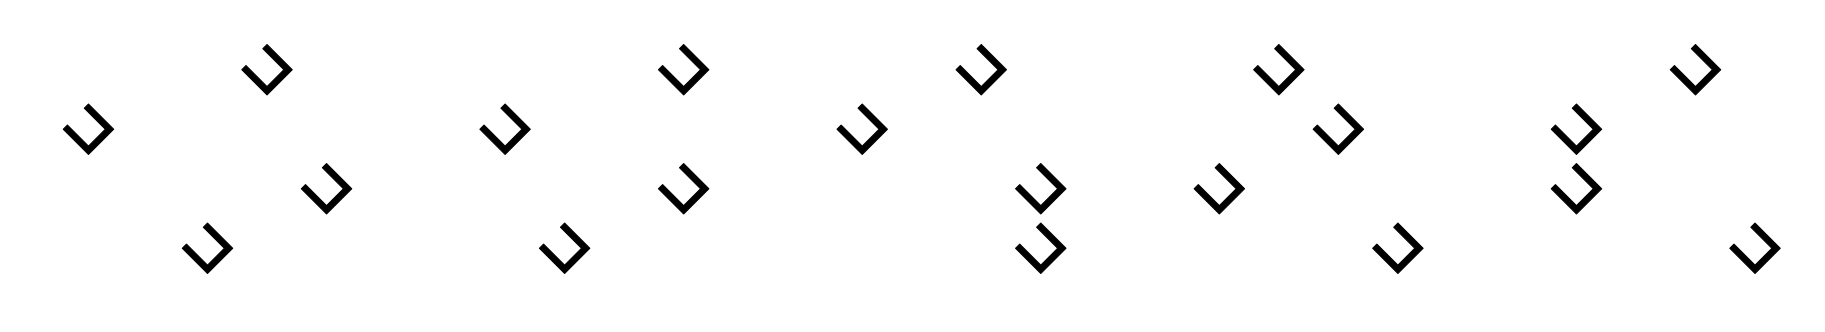

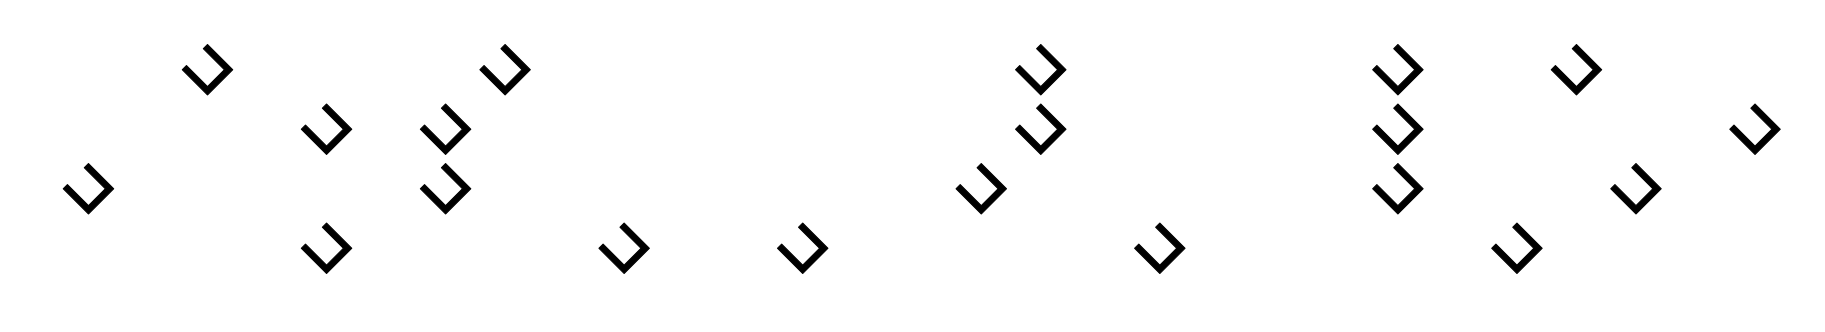

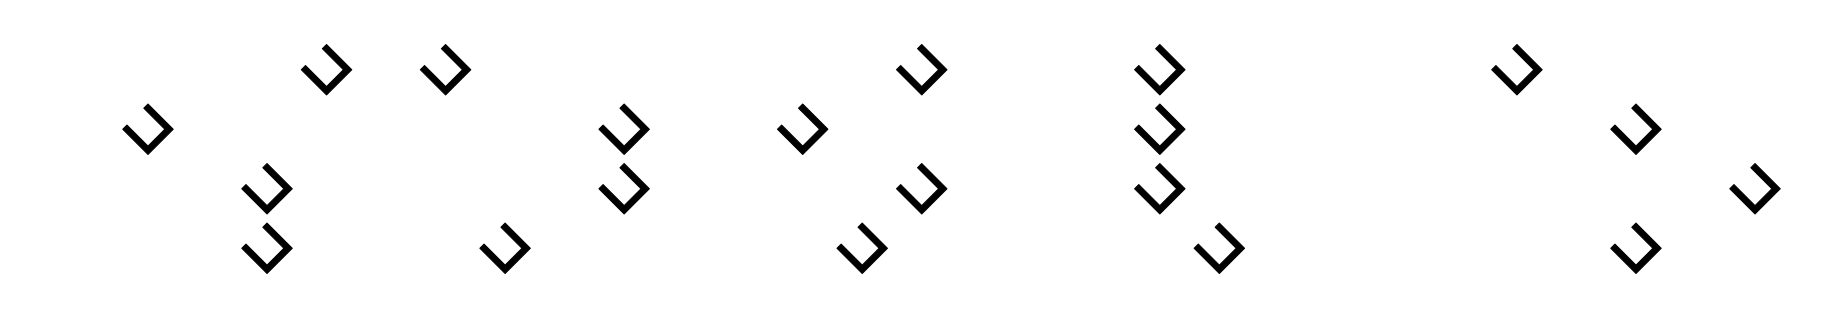

In [271]:
send_rand_mask(3,3, nmask=range(5), nmod=0, plot=True)

## Configuraciones de aceleracion y velocidad

In [273]:
c = make_config(255, clase='same', mod=0, tipo='vel')
save_config(c, configname(0, tipo='vel'), type_='vel')
c = make_config(20, clase='same', mod=0, tipo='vel')
save_config(c, configname(1, tipo='vel'), type_='vel')
c = make_config(255, clase='same', mod=0, tipo='acl')
save_config(c, configname(0, tipo='acl'), type_='acl')
c = make_config(20, clase='same', mod=0, tipo='acl')
save_config(c, configname(1, tipo='acl'), type_='acl')